<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Cuts" data-toc-modified-id="Data-Cuts-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Cuts</a></span></li><li><span><a href="#Evaluating-Offensive-Metrics" data-toc-modified-id="Evaluating-Offensive-Metrics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Evaluating Offensive Metrics</a></span><ul class="toc-item"><li><span><a href="#Correlation-of-Offensive-Statistics" data-toc-modified-id="Correlation-of-Offensive-Statistics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Correlation of Offensive Statistics</a></span></li><li><span><a href="#Scoring-Statistics" data-toc-modified-id="Scoring-Statistics-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Scoring Statistics</a></span></li><li><span><a href="#Assessing-Offensive-Impact-of-Playmaking-and-Possessions-Saved" data-toc-modified-id="Assessing-Offensive-Impact-of-Playmaking-and-Possessions-Saved-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Assessing Offensive Impact of Playmaking and Possessions Saved</a></span></li></ul></li><li><span><a href="#Evaluating-Defensive-Metrics" data-toc-modified-id="Evaluating-Defensive-Metrics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Evaluating Defensive Metrics</a></span><ul class="toc-item"><li><span><a href="#Correlation-of-Defensive-Statistics" data-toc-modified-id="Correlation-of-Defensive-Statistics-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Correlation of Defensive Statistics</a></span></li><li><span><a href="#Defensive-Impact-Observables" data-toc-modified-id="Defensive-Impact-Observables-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Defensive Impact Observables</a></span></li><li><span><a href="#Relating-Defensive-Ratings-with-Opponent-Scoring-Efficiency" data-toc-modified-id="Relating-Defensive-Ratings-with-Opponent-Scoring-Efficiency-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Relating Defensive Ratings with Opponent Scoring Efficiency</a></span></li></ul></li><li><span><a href="#Examining-Shot-Selection" data-toc-modified-id="Examining-Shot-Selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Examining Shot Selection</a></span><ul class="toc-item"><li><span><a href="#2-PT-and-3-PT-Usage" data-toc-modified-id="2-PT-and-3-PT-Usage-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>2 PT and 3 PT Usage</a></span></li><li><span><a href="#Shot-Selection-by-Location" data-toc-modified-id="Shot-Selection-by-Location-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Shot Selection by Location</a></span></li><li><span><a href="#Shot-Selection-by-Number-of-Dribbles" data-toc-modified-id="Shot-Selection-by-Number-of-Dribbles-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Shot Selection by Number of Dribbles</a></span></li><li><span><a href="#Shot-Selection-by-Defender-Separation" data-toc-modified-id="Shot-Selection-by-Defender-Separation-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Shot Selection by Defender Separation</a></span></li></ul></li><li><span><a href="#Breakdown-of-Play-Types-and-Styles" data-toc-modified-id="Breakdown-of-Play-Types-and-Styles-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Breakdown of Play Types and Styles</a></span><ul class="toc-item"><li><span><a href="#Usage-and-Efficiency-of-Offensive-Play-Type-by-Position" data-toc-modified-id="Usage-and-Efficiency-of-Offensive-Play-Type-by-Position-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Usage and Efficiency of Offensive Play Type by Position</a></span></li><li><span><a href="#Frequency-and-Efficiency-of-Defensive-Play-Type-by-Position" data-toc-modified-id="Frequency-and-Efficiency-of-Defensive-Play-Type-by-Position-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Frequency and Efficiency of Defensive Play Type by Position</a></span></li><li><span><a href="#Distribution-of-Offensive-and-Defensive-Play-Type-Usage" data-toc-modified-id="Distribution-of-Offensive-and-Defensive-Play-Type-Usage-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Distribution of Offensive and Defensive Play Type Usage</a></span></li></ul></li><li><span><a href="#Player-Clustering-(by-Position)" data-toc-modified-id="Player-Clustering-(by-Position)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Player Clustering (by Position)</a></span><ul class="toc-item"><li><span><a href="#Clustering-Centers" data-toc-modified-id="Clustering-Centers-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Clustering Centers</a></span></li><li><span><a href="#Clustering-Forwards" data-toc-modified-id="Clustering-Forwards-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Clustering Forwards</a></span></li><li><span><a href="#Clustering-Guards" data-toc-modified-id="Clustering-Guards-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Clustering Guards</a></span></li></ul></li></ul></div>

In [1]:
# Import modules and packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import json
import pandas as pd
import seaborn as sns
import unidecode
import unicodedata
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [2]:
sns.set_style("whitegrid")

In [3]:
# Read in compiled NBA player data
df_orig = pd.read_csv('../CompleteNBAPlayerStats.csv')
print("Table of BBall Player Stats:\n\n", df_orig)

Table of BBall Player Stats:

                  name pos team  year    GP    GS  height  weight   college  \
0        Andre Miller  PG  TOT  2016  39.0   4.0    74.0   200.0      Utah   
1       Dirk Nowitzki  PF  DAL  2016  75.0  75.0    83.0   237.0      None   
2       Dirk Nowitzki  PF  DAL  2017  54.0  54.0    83.0   237.0      None   
3       Dirk Nowitzki   C  DAL  2018  77.0  77.0    83.0   237.0      None   
4       Dirk Nowitzki  PF  DAL  2019  51.0  20.0    83.0   237.0      None   
...               ...  ..  ...   ...   ...   ...     ...     ...       ...   
1742    Rui Hachimura  PF  WAS  2020  25.0  25.0    80.0   230.0   Gonzaga   
1743  Sekou Doumbouya  SF  DET  2020  14.0   7.0    80.0   230.0      None   
1744    Terence Davis  SG  TOR  2020  39.0   1.0    76.0   201.0      None   
1745        Ty Jerome  PG  PHX  2020  10.0   0.0    77.0   195.0  Virginia   
1746      Tyler Herro  SG  MIA  2020  38.0   3.0    77.0   195.0  Kentucky   

      country  ...  OFF_SCORE_FR

# Data Cuts

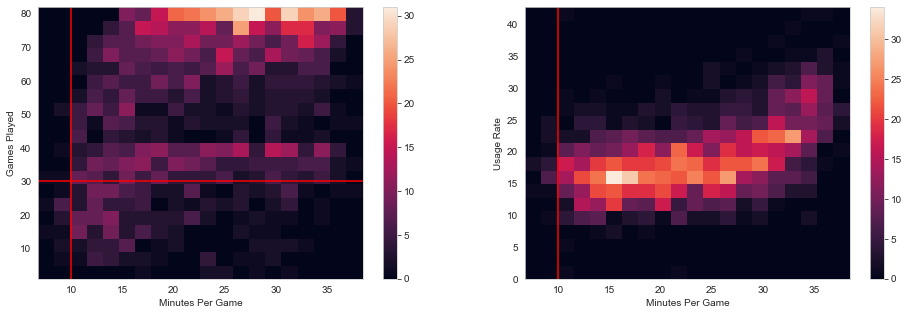

In [4]:
# Establish a minimum number of games played and minutes per game (MPG)
min_num_games = 30
min_MPG = 10

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

plt.axes(ax[0])
plt.xlabel("Minutes Per Game")
plt.ylabel("Games Played")
plt.hist2d(df_orig.MPG, df_orig.GP, bins=20)
plt.colorbar()
plt.axhline(min_num_games, c='r')
plt.axvline(min_MPG, c='r')

plt.axes(ax[1])
plt.xlabel("Minutes Per Game")
plt.ylabel("Usage Rate")
plt.hist2d(df_orig.MPG, df_orig.USG, bins=20)
plt.colorbar()
plt.axvline(min_MPG, c='r')


In [5]:
# Dataframes after cutting on GP/MPG/other parameters
df = df_orig.copy()
df = df[df.GP > min_num_games]
df = df[df.MPG > min_MPG]

In [6]:
# Add some additional variables
## To convert to "per 36-min" stats
df['2PA_PG'] = df['2PA_PT']*df.MPG/36.
df['3PA_PG'] = df['3PA_PT']*df.MPG/36.
df['FGA_PG'] = df.FGA_PT*df.MPG/36.

df["2PR"] = df["2PA_PH"]/df["FGA_PH"]
df["3PR"] = df["3PA_PH"]/df["FGA_PH"]

df['FG_FREQ_RIM'] = (df.FGA_RA)/df.FGA_PG # restricted area
df['FG_FREQ_MR_AND_PT'] = (df.FGA_MR + df.FGA_NONRA)/df.FGA_PG # combined paint and midrange
df['FG_FREQ_MR'] = (df.FGA_MR)/df.FGA_PG
df['FG_FREQ_CORNERS'] = (df.FGA_LC + df.FGA_RC)/df.FGA_PG
df['FG_FREQ_AB'] = df.FGA_AB/df.FGA_PG
df['FG_FREQ_01DRIB'] = (df['FGA_0DRIB'] + df['FGA_1DRIB'])/df.FGA_PG
df['FG_FREQ_GT1DRIB'] = (df['FGA_2DRIB'] + df['FGA_36DRIB'] + df['FGA_GT7DRIB'])/df.FGA_PG
df['FG_FREQ_CANDS'] = df['FGA_CANDS']/df.FGA_PG

df["FG_FREQ_RIM"].fillna(0, inplace=True)
df["FG_FREQ_MR_AND_PT"].fillna(0, inplace=True)
df["FG_FREQ_MR"].fillna(0, inplace=True)
df["FG_FREQ_CORNERS"].fillna(0, inplace=True)
df["FG_FREQ_AB"].fillna(0, inplace=True)
df["FG_FREQ_01DRIB"].fillna(0, inplace=True)
df["FG_FREQ_GT1DRIB"].fillna(0, inplace=True)
df["FG_FREQ_CANDS"].fillna(0, inplace=True)

# Opponent field goal percentages weighted by zone
#df['OPP_FGP_3PT'] = (df.OPP_FGP_RC*df.OPP_FGA_RC + df.OPP_FGP_LC*df.OPP_FGA_LC + df.OPP_FGP_AB*df.OPP_FGA_AB)/(df.OPP_FGA_RC+df.OPP_FGA_LC+df.OPP_FGA_AB)


In [7]:
# Various dataframes separating rookies from established veterans,
# as well as median data to exclude outliers for veteran players
df_vets = df[df["name"].isin(df["name"].value_counts()[df["name"].value_counts()>1].index)]
df_rooks = df[df["name"].isin(df["name"].value_counts()[df["name"].value_counts()==1].index)]
df_med = df_vets.groupby("name").median().reset_index()

# Dataframes by player position
# Centers
dfc = df[df['pos'].str.contains('C')]
# Forwards
dff = df[df['pos'].str.contains('F')]
# Guards
dfg = df[df['pos'].str.contains('G')]


# Evaluating Offensive Metrics

## Correlation of Offensive Statistics

(41, -0.5)

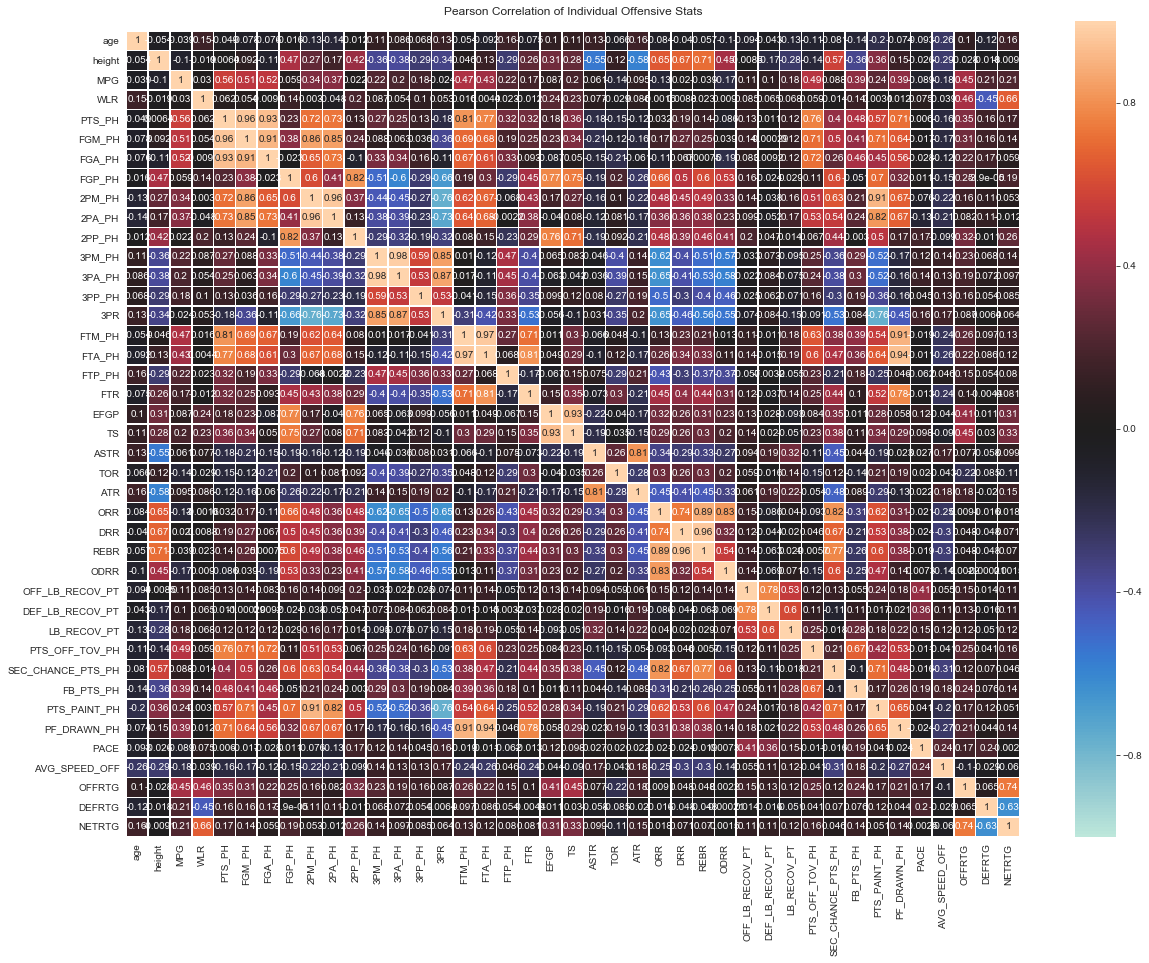

In [8]:
fig, ax = plt.subplots(figsize=(20, 15))
cols_to_inc = ['age','height','MPG','WLR','PTS_PH','FGM_PH','FGA_PH','FGP_PH','2PM_PH','2PA_PH','2PP_PH','3PM_PH','3PA_PH','3PP_PH','3PR','FTM_PH','FTA_PH','FTP_PH','FTR','EFGP','TS','ASTR','TOR','ATR','ORR','DRR','REBR','ODRR','OFF_LB_RECOV_PT','DEF_LB_RECOV_PT','LB_RECOV_PT','PTS_OFF_TOV_PH','SEC_CHANCE_PTS_PH','FB_PTS_PH','PTS_PAINT_PH','PF_DRAWN_PH','PACE','AVG_SPEED_OFF','OFFRTG','DEFRTG','NETRTG']
features = df[cols_to_inc]
pc = features.corr(method='pearson')
sns.heatmap(pc, annot=True, xticklabels=pc.columns, 
            yticklabels=pc.columns, ax=ax, linewidths=.5, 
            vmin = -1, vmax=1, center=0)
plt.title("Pearson Correlation of Individual Offensive Stats")
ax.set_ylim(len(pc), -0.5)


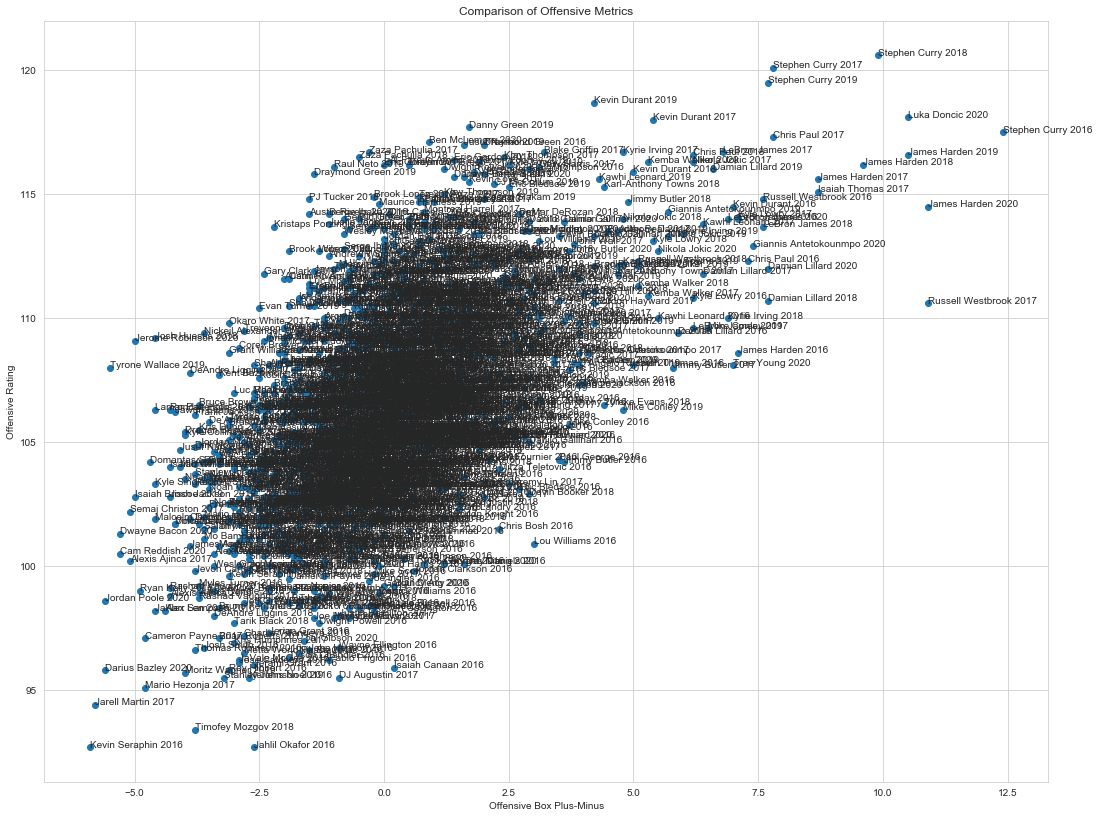

In [9]:
fig, ax = plt.subplots(figsize=(18, 14))
plt.scatter(df.OBPM, df.OFFRTG)
plt.title("Comparison of Offensive Metrics")
plt.xlabel("Offensive Box Plus-Minus")
plt.ylabel("Offensive Rating")
for i, txt in enumerate(df.name):
    ax.annotate(txt+' '+str(df.year.values[i]), (df.OBPM.values[i], df.OFFRTG.values[i]))
    

## Scoring Statistics

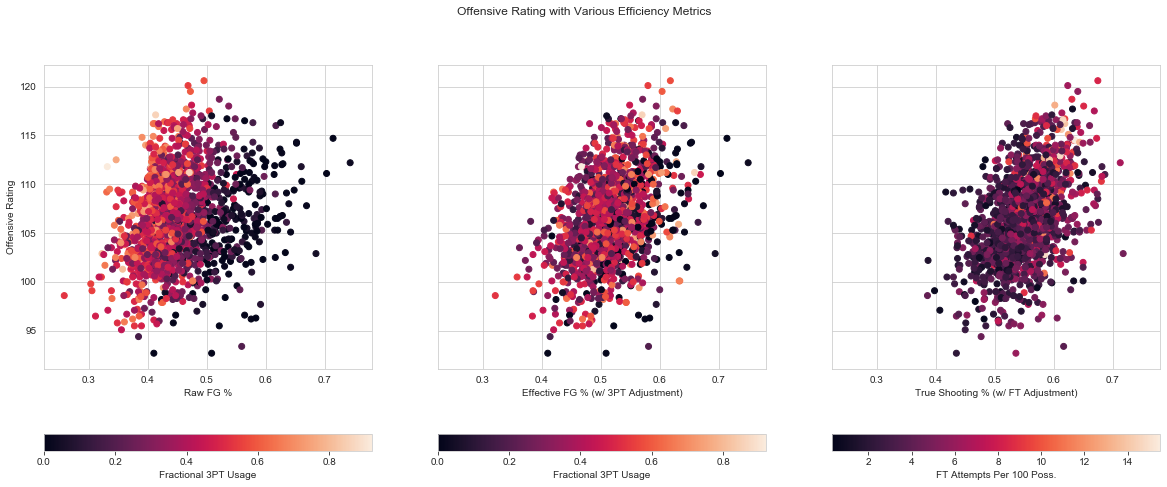

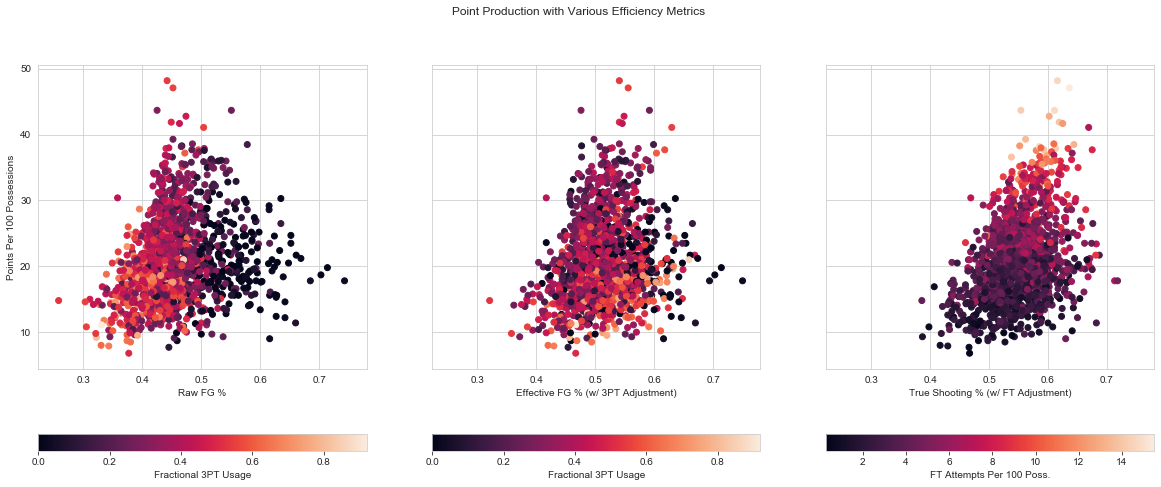

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(20, 8), sharex=True, sharey=True)
plt.suptitle("Offensive Rating with Various Efficiency Metrics")

plt.axes(ax[0])
plt.xlabel("Raw FG %")
plt.ylabel("Offensive Rating")
plt.scatter(df.FGP_PH, df.OFFRTG, c=df['3PR'])
clb = plt.colorbar(orientation='horizontal')
clb.set_label('Fractional 3PT Usage')

plt.axes(ax[1])
plt.xlabel("Effective FG % (w/ 3PT Adjustment)")
plt.scatter(df.EFGP, df.OFFRTG, c=df['3PR'])
clb = plt.colorbar(orientation='horizontal')
clb.set_label('Fractional 3PT Usage')

plt.axes(ax[2])
plt.xlabel("True Shooting % (w/ FT Adjustment)")
plt.scatter(df.TS, df.OFFRTG, c=df['FTA_PH'])
clb = plt.colorbar(orientation='horizontal')
clb.set_label('FT Attempts Per 100 Poss.')


fig, ax = plt.subplots(1, 3, figsize=(20, 8), sharex=True, sharey=True)
plt.suptitle("Point Production with Various Efficiency Metrics")

plt.axes(ax[0])
plt.xlabel("Raw FG %")
plt.ylabel("Points Per 100 Possessions")
plt.scatter(df.FGP_PH, df.PTS_PH, c=df['3PR'])
clb = plt.colorbar(orientation='horizontal')
clb.set_label('Fractional 3PT Usage')

plt.axes(ax[1])
plt.xlabel("Effective FG % (w/ 3PT Adjustment)")
plt.scatter(df.EFGP, df.PTS_PH, c=df['3PR'])
clb = plt.colorbar(orientation='horizontal')
clb.set_label('Fractional 3PT Usage')

plt.axes(ax[2])
plt.xlabel("True Shooting % (w/ FT Adjustment)")
plt.scatter(df.TS, df.PTS_PH, c=df['FTA_PH'])
clb = plt.colorbar(orientation='horizontal')
clb.set_label('FT Attempts Per 100 Poss.')

#cax,kw = mpl.colorbar.make_axes([x for x in ax.flat])
#plt.colorbar(fig, cax=cax, **kw)


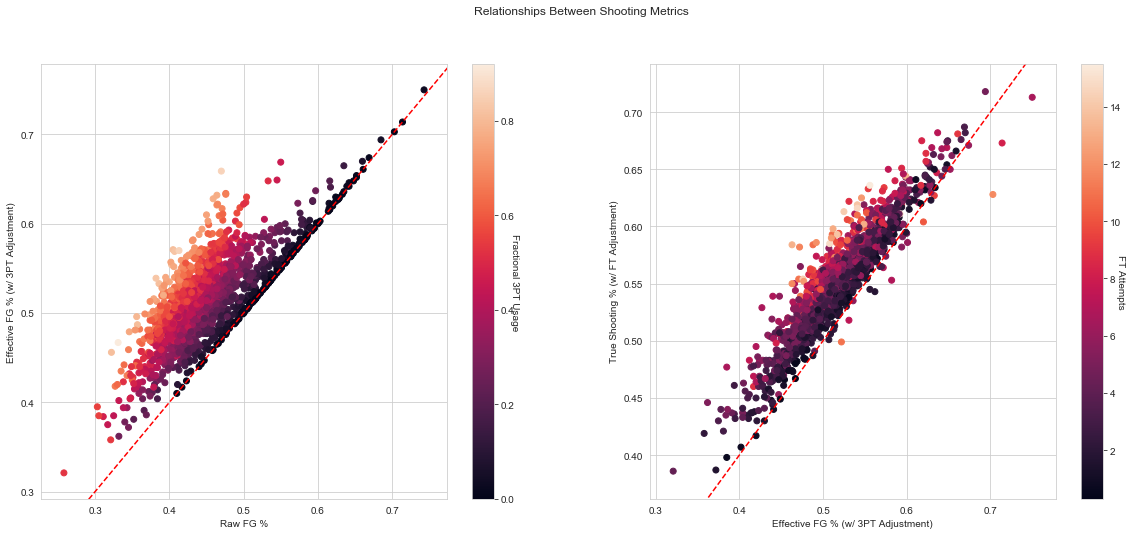

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
plt.suptitle("Relationships Between Shooting Metrics")

plt.axes(ax[0])
plt.xlabel("Raw FG %")
plt.ylabel("Effective FG % (w/ 3PT Adjustment)")
plt.scatter(df.FGP_PH, df.EFGP, c=df["3PR"])
xmin, xmax = ax[0].get_xlim()
ymin, ymax = ax[0].get_ylim()
plt.plot([0,1], [0,1], 'r--')
ax[0].set_xlim(xmin, xmax)
ax[0].set_ylim(ymin, ymax)
clb = plt.colorbar()
clb.set_label('Fractional 3PT Usage', rotation=270)
#for i, txt in enumerate(df[df.OFFRTG.values>80].name.values):
#    ax.annotate(txt+' '+str(df.year.values[i]), (df.FGP.values[i], df.EFGP.values[i]))

plt.axes(ax[1])
plt.xlabel("Effective FG % (w/ 3PT Adjustment)")
plt.ylabel("True Shooting % (w/ FT Adjustment)")
plt.scatter(df.EFGP, df.TS, c=df.FTA_PH)
xmin, xmax = ax[1].get_xlim()
ymin, ymax = ax[1].get_ylim()
plt.plot([0,1], [0,1], 'r--')
ax[1].set_xlim(xmin, xmax)
ax[1].set_ylim(ymin, ymax)
clb = plt.colorbar()
clb.set_label('FT Attempts', rotation=270)
#for i, txt in enumerate(df[df.OFFRTG.values>80].name.values):
#    ax.annotate(txt+' '+str(df.year.values[i]), (df.EFGP.values[i]/100., df.TS.values[i]))


## Assessing Offensive Impact of Playmaking and Possessions Saved

(-0.3665053763440861, 5)

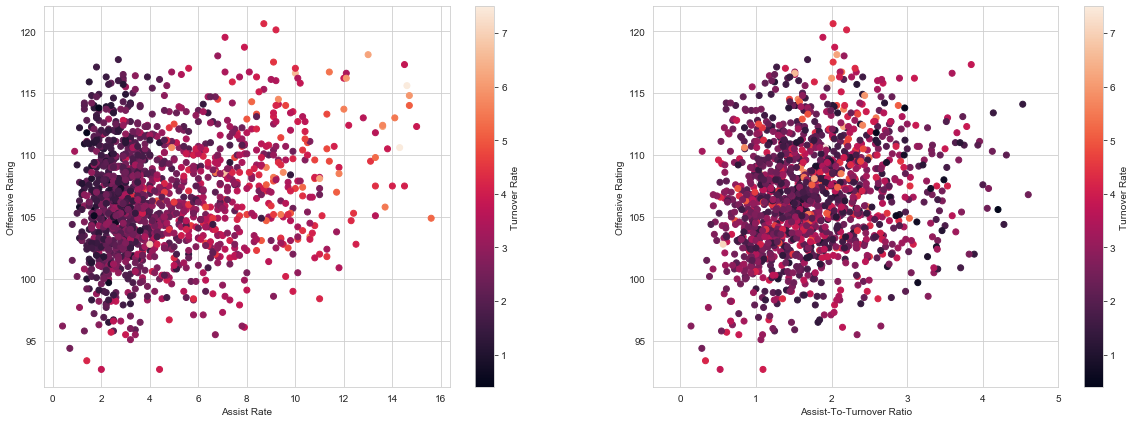

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
plt.suptitle("")

plt.axes(ax[0])
plt.xlabel("Assist Rate")
plt.ylabel("Offensive Rating")
plt.scatter(df.AST_PH, df.OFFRTG, c=df.TOV_PH)
clb = plt.colorbar()
clb.set_label('Turnover Rate')
xmin, xmax = ax[0].get_xlim()

plt.axes(ax[1])
plt.xlabel("Assist-To-Turnover Ratio")
plt.ylabel("Offensive Rating")
plt.scatter(df.ATR, df.OFFRTG, c=df.TOV_PH)
clb = plt.colorbar()
clb.set_label('Turnover Rate')
plt.xlim(xmin, 5)


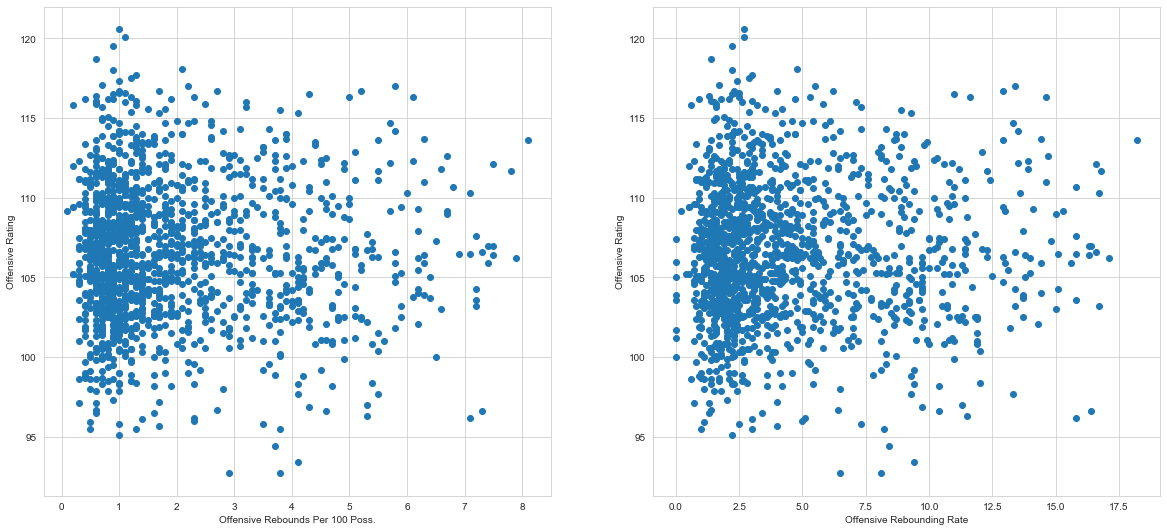

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20, 9))
plt.suptitle("")

plt.axes(ax[0])
plt.xlabel("Offensive Rebounds Per 100 Poss.")
plt.ylabel("Offensive Rating")
plt.scatter(df.ORB_PH, df.OFFRTG)

plt.axes(ax[1])
plt.xlabel("Offensive Rebounding Rate")
plt.ylabel("Offensive Rating")
plt.scatter(df.ORR, df.OFFRTG)


(88, 125)

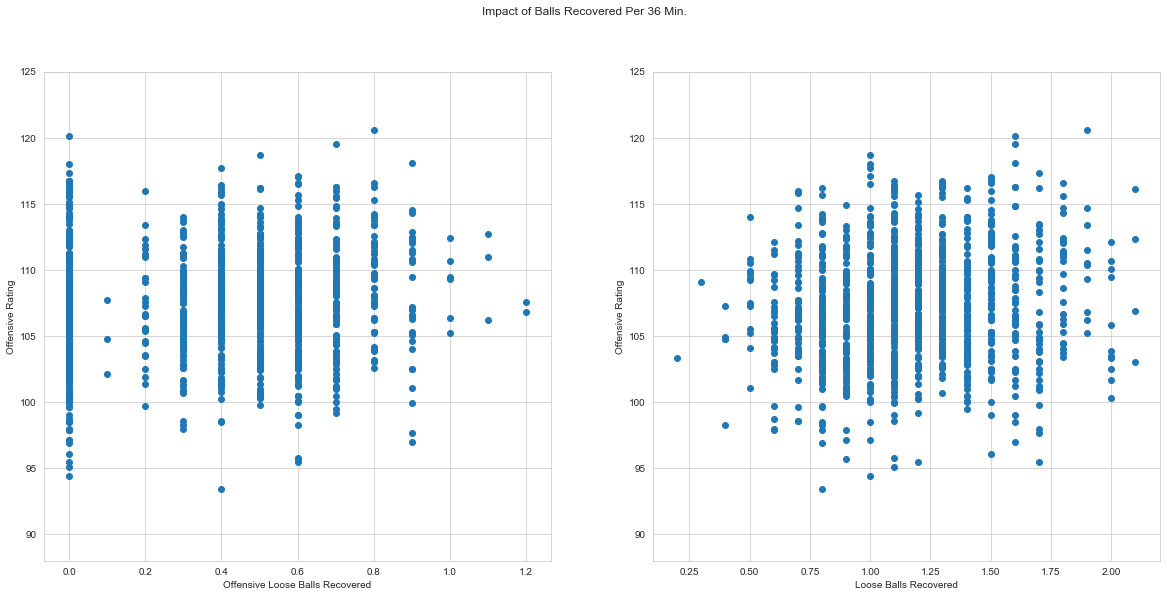

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20, 9))
plt.suptitle("Impact of Balls Recovered Per 36 Min.")

plt.axes(ax[0])
plt.xlabel("Offensive Loose Balls Recovered")
plt.ylabel("Offensive Rating")
plt.scatter(df.OFF_LB_RECOV_PT, df.OFFRTG)
plt.ylim(88, 125)

plt.axes(ax[1])
plt.xlabel("Loose Balls Recovered")
plt.ylabel("Offensive Rating")
plt.scatter(df.LB_RECOV_PT, df.OFFRTG)
plt.ylim(88, 125)


# Evaluating Defensive Metrics

## Correlation of Defensive Statistics

(34, -0.5)

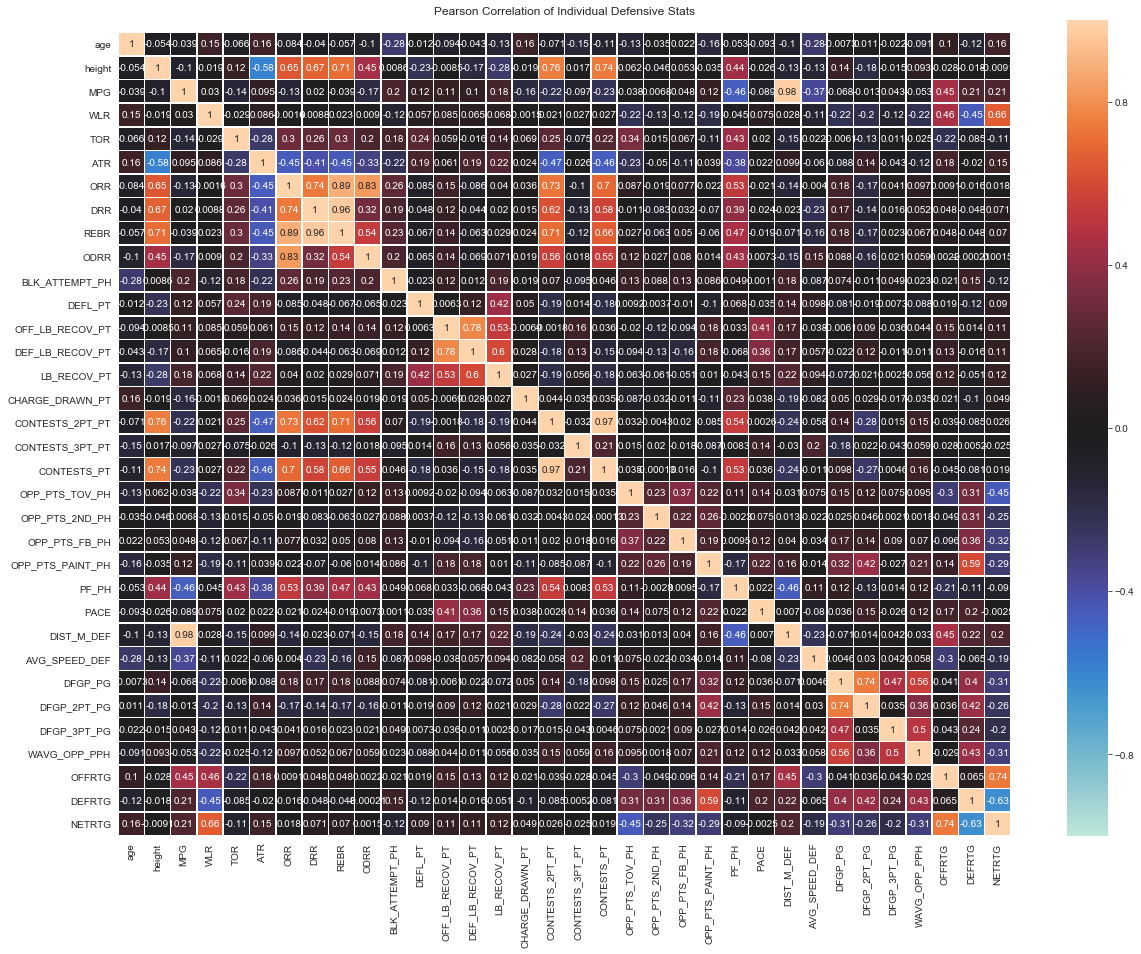

In [15]:
fig, ax = plt.subplots(figsize=(20, 15))
cols_to_inc = ['age','height','MPG','WLR','TOR','ATR','ORR','DRR','REBR','ODRR','BLK_ATTEMPT_PH','DEFL_PT','OFF_LB_RECOV_PT','DEF_LB_RECOV_PT','LB_RECOV_PT','CHARGE_DRAWN_PT','CONTESTS_2PT_PT','CONTESTS_3PT_PT','CONTESTS_PT','OPP_PTS_TOV_PH','OPP_PTS_2ND_PH','OPP_PTS_FB_PH','OPP_PTS_PAINT_PH','PF_PH','PACE','DIST_M_DEF','AVG_SPEED_DEF','DFGP_PG','DFGP_2PT_PG','DFGP_3PT_PG','WAVG_OPP_PPH','OFFRTG','DEFRTG','NETRTG']
features = df[cols_to_inc]
pc = features.corr(method='pearson')
sns.heatmap(pc, annot=True, xticklabels=pc.columns, 
            yticklabels=pc.columns, ax=ax, linewidths=.5, 
            vmin = -1, vmax=1, center=0)
plt.title("Pearson Correlation of Individual Defensive Stats")
ax.set_ylim(len(pc), -0.5)


## Defensive Impact Observables

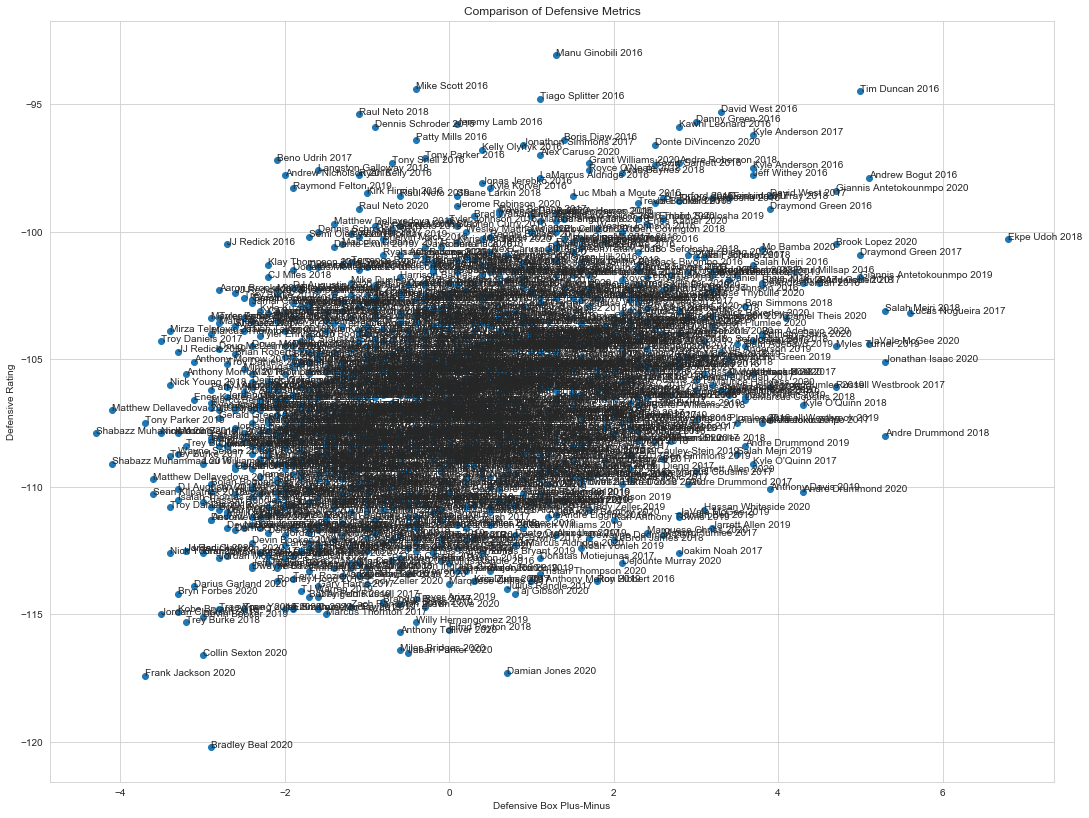

In [16]:
fig, ax = plt.subplots(figsize=(18, 14))
plt.scatter(df.DBPM, -df.DEFRTG)
plt.title("Comparison of Defensive Metrics")
plt.xlabel("Defensive Box Plus-Minus")
plt.ylabel("Defensive Rating")
for i, txt in enumerate(df.name):
    ax.annotate(txt+' '+str(df.year.values[i]), (df.DBPM.values[i], -df.DEFRTG.values[i]))


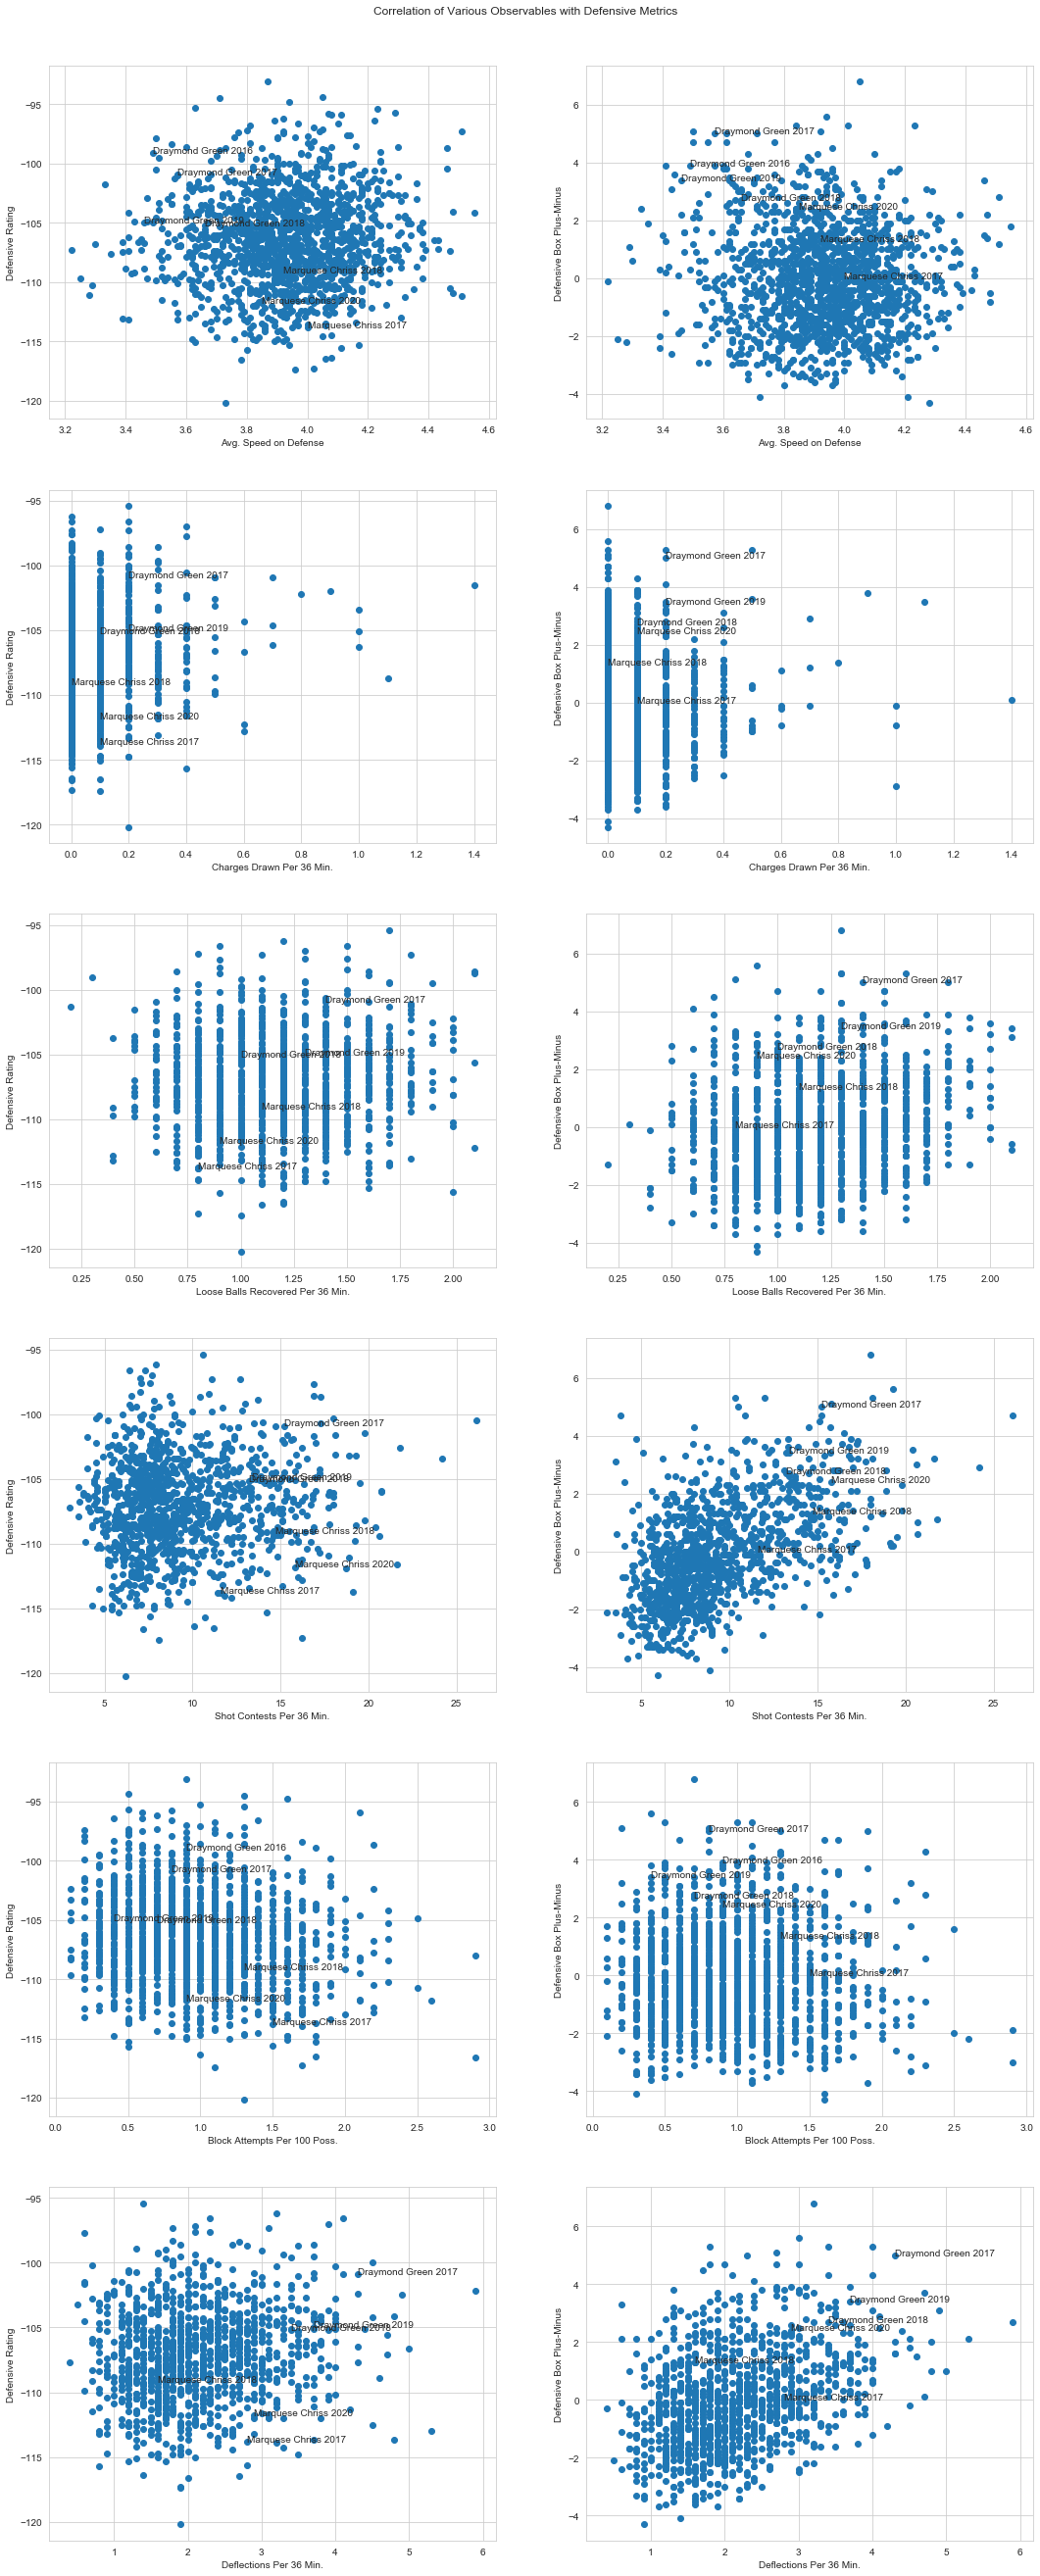

In [17]:
fig, ax = plt.subplots(6, 2, figsize=(18, 42))
plt.suptitle("Correlation of Various Observables with Defensive Metrics")
fig.subplots_adjust(top=0.96)


# Interestingly, very little correlation with speed on defense and defensive rating.
# If anything, well-known good defenders are slower and more deliberate...
plt.axes(ax[0,0])
plt.xlabel("Avg. Speed on Defense")
plt.ylabel("Defensive Rating")
plt.scatter(df.AVG_SPEED_DEF, -df.DEFRTG)
for i, txt in enumerate(df.name):
    if txt == "Marquese Chriss" or txt == "Draymond Green":
        ax[0,0].annotate(txt+' '+str(df.year.values[i]), (df.AVG_SPEED_DEF.values[i], -df.DEFRTG.values[i]))

plt.axes(ax[0,1])
plt.scatter(df.AVG_SPEED_DEF, df.DBPM)
plt.xlabel("Avg. Speed on Defense")
plt.ylabel("Defensive Box Plus-Minus")
for i, txt in enumerate(df.name):
    if txt == "Marquese Chriss" or txt == "Draymond Green":
        ax[0,1].annotate(txt+' '+str(df.year.values[i]), (df.AVG_SPEED_DEF.values[i], df.DBPM.values[i]))


# Very wide scatter, little correlation with charges drawn...
# Have to be VERY exceptional at this for it to have great impact.
# Great defenders can draw a charge, but isn't the crux of great defense.
plt.axes(ax[1,0])
plt.xlabel("Charges Drawn Per 36 Min.")
plt.ylabel("Defensive Rating")
plt.scatter(df.CHARGE_DRAWN_PT, -df.DEFRTG)
for i, txt in enumerate(df.name):
    if txt == "Marquese Chriss" or txt == "Draymond Green":
        ax[1,0].annotate(txt+' '+str(df.year.values[i]), (df.CHARGE_DRAWN_PT.values[i], -df.DEFRTG.values[i]))

plt.axes(ax[1,1])
plt.scatter(df.CHARGE_DRAWN_PT, df.DBPM)
plt.xlabel("Charges Drawn Per 36 Min.")
plt.ylabel("Defensive Box Plus-Minus")
for i, txt in enumerate(df.name):
    if txt == "Marquese Chriss" or txt == "Draymond Green":
        ax[1,1].annotate(txt+' '+str(df.year.values[i]), (df.CHARGE_DRAWN_PT.values[i], df.DBPM.values[i]))


# Loose balls recovered appears to have almost no correlation
# with defensive rating, very flat distribution.
# Most "hustle" players are middle-of-the-pack defensively.
# Maybe there is a correlation with being a guard, or smaller player...?
plt.axes(ax[2,0])
plt.xlabel("Loose Balls Recovered Per 36 Min.")
plt.ylabel("Defensive Rating")
plt.scatter(df.LB_RECOV_PT, -df.DEFRTG)
for i, txt in enumerate(df.name):
    if txt == "Marquese Chriss" or txt == "Draymond Green":
        ax[2,0].annotate(txt+' '+str(df.year.values[i]), (df.LB_RECOV_PT.values[i], -df.DEFRTG.values[i]))

plt.axes(ax[2,1])
plt.scatter(df.LB_RECOV_PT, df.DBPM)
plt.xlabel("Loose Balls Recovered Per 36 Min.")
plt.ylabel("Defensive Box Plus-Minus")
for i, txt in enumerate(df.name):
    if txt == "Marquese Chriss" or txt == "Draymond Green":
        ax[2,1].annotate(txt+' '+str(df.year.values[i]), (df.LB_RECOV_PT.values[i], df.DBPM.values[i]))


# Very little correlation actually. "Arrowhead" shape to distribution.
# Great defenders tend to contest, but on average the most frequent contesters 
# have middle-of-the-pack defensive rating.
plt.axes(ax[3,0])
plt.xlabel("Shot Contests Per 36 Min.")
plt.ylabel("Defensive Rating")
plt.scatter(df.CONTESTS_PT, -df.DEFRTG)
for i, txt in enumerate(df.name):
    if txt == "Marquese Chriss" or txt == "Draymond Green":
        ax[3,0].annotate(txt+' '+str(df.year.values[i]), (df.CONTESTS_PT.values[i], -df.DEFRTG.values[i]))

plt.axes(ax[3,1])
plt.scatter(df.CONTESTS_PT, df.DBPM)
plt.xlabel("Shot Contests Per 36 Min.")
plt.ylabel("Defensive Box Plus-Minus")
for i, txt in enumerate(df.name):
    if txt == "Marquese Chriss" or txt == "Draymond Green":
        ax[3,1].annotate(txt+' '+str(df.year.values[i]), (df.CONTESTS_PT.values[i], df.DBPM.values[i]))

        
plt.axes(ax[4,0])
plt.xlabel("Block Attempts Per 100 Poss.")
plt.ylabel("Defensive Rating")
plt.scatter(df.BLK_ATTEMPT_PH, -df.DEFRTG)
for i, txt in enumerate(df.name):
    if txt == "Marquese Chriss" or txt == "Draymond Green":
        ax[4,0].annotate(txt+' '+str(df.year.values[i]), (df.BLK_ATTEMPT_PH.values[i], -df.DEFRTG.values[i]))

plt.axes(ax[4,1])
plt.scatter(df.BLK_ATTEMPT_PH, df.DBPM)
plt.xlabel("Block Attempts Per 100 Poss.")
plt.ylabel("Defensive Box Plus-Minus")
for i, txt in enumerate(df.name):
    if txt == "Marquese Chriss" or txt == "Draymond Green":
        ax[4,1].annotate(txt+' '+str(df.year.values[i]), (df.BLK_ATTEMPT_PH.values[i], df.DBPM.values[i]))


# A little more correlation between deflections and defensive rating,
# which is sensible since it takes length and savvy to save buckets.
# The best defenders tend to have more deflections.
plt.axes(ax[5,0])
plt.xlabel("Deflections Per 36 Min.")
plt.ylabel("Defensive Rating")
plt.scatter(df.DEFL_PT, -df.DEFRTG)
for i, txt in enumerate(df.name):
    if txt == "Marquese Chriss" or txt == "Draymond Green":
        ax[5,0].annotate(txt+' '+str(df.year.values[i]), (df.DEFL_PT.values[i], -df.DEFRTG.values[i]))

plt.axes(ax[5,1])
plt.scatter(df.DEFL_PT, df.DBPM)
plt.xlabel("Deflections Per 36 Min.")
plt.ylabel("Defensive Box Plus-Minus")
for i, txt in enumerate(df.name):
    if txt == "Marquese Chriss" or txt == "Draymond Green":
        ax[5,1].annotate(txt+' '+str(df.year.values[i]), (df.DEFL_PT.values[i], df.DBPM.values[i]))



## Relating Defensive Ratings with Opponent Scoring Efficiency

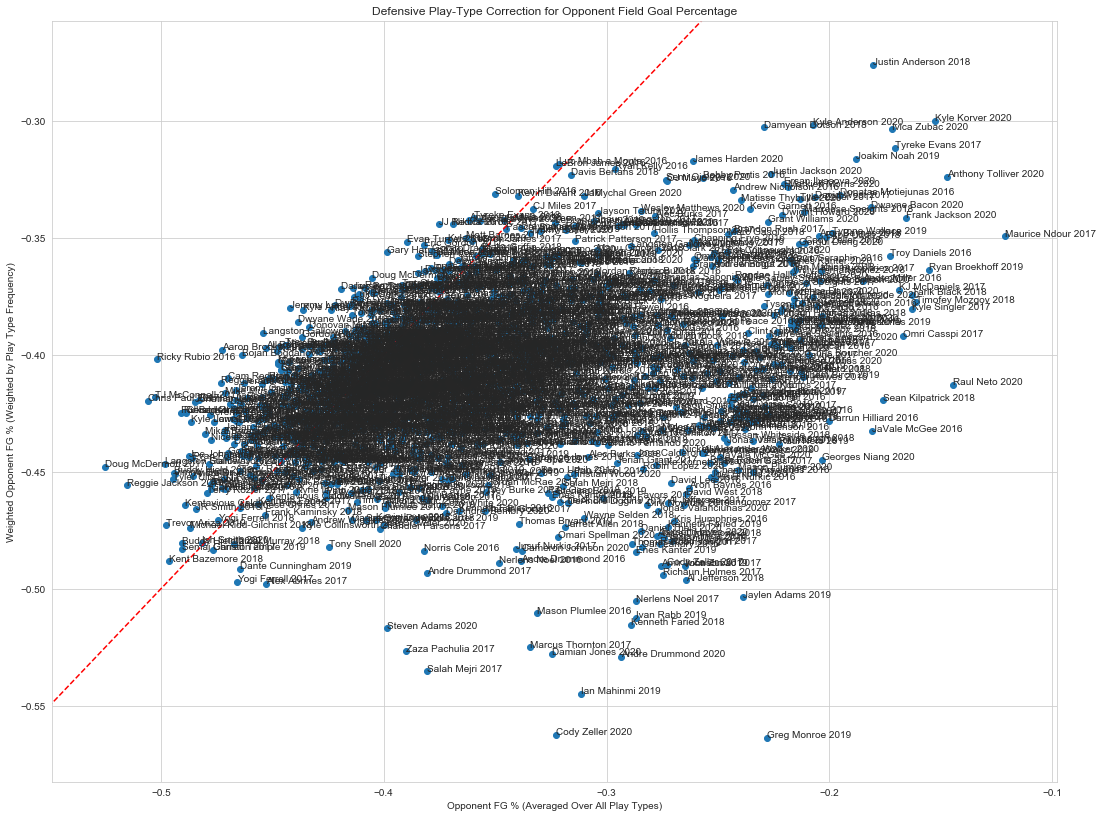

In [18]:
fig, ax = plt.subplots(figsize=(18, 14))
plt.scatter(-df.AVG_OPP_FGP, -df.WAVG_OPP_FGP)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
plt.plot([-1,0], [-1,0], 'r--')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
plt.title("Defensive Play-Type Correction for Opponent Field Goal Percentage")
plt.xlabel("Opponent FG % (Averaged Over All Play Types)")
plt.ylabel("Weighted Opponent FG % (Weighted by Play Type Frequency)")
for i, txt in enumerate(df.name):
    ax.annotate(txt+' '+str(df.year.values[i]), (-df.AVG_OPP_FGP.values[i], -df.WAVG_OPP_FGP.values[i]))


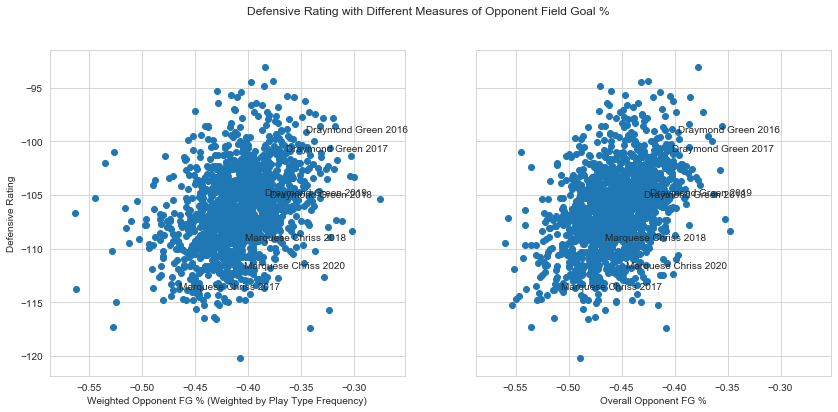

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)
plt.suptitle("Defensive Rating with Different Measures of Opponent Field Goal %")

#plt.axes(ax[0])
#plt.xlabel("Opponent FG % (Averaged Over All Play Types)")
#plt.ylabel("Defensive Rating")
#plt.scatter(-df.AVG_OPP_FGP, -df.DEFRTG)
#for i, txt in enumerate(df.name):
#    if txt == "Marquese Chriss" or txt == "Draymond Green":
#        ax[0].annotate(txt+' '+str(df.year.values[i]), (-df.AVG_OPP_FGP.values[i], -df.DEFRTG.values[i]))

#plt.axes(ax[1])
plt.axes(ax[0])
plt.xlabel("Weighted Opponent FG % (Weighted by Play Type Frequency)")
plt.ylabel("Defensive Rating")
plt.scatter(-df.WAVG_OPP_FGP, -df.DEFRTG)
for i, txt in enumerate(df.name):
    if txt == "Marquese Chriss" or txt == "Draymond Green":
        ax[0].annotate(txt+' '+str(df.year.values[i]), (-df.WAVG_OPP_FGP.values[i], -df.DEFRTG.values[i]))
        
plt.axes(ax[1])
#plt.title("Defensive Rating as a Function of Opponent Field Goal %")
plt.xlabel("Overall Opponent FG %")
plt.scatter(-df.DFGP_PG, -df.DEFRTG)
for i, txt in enumerate(df.name):
    if txt == "Marquese Chriss" or txt == "Draymond Green":
        ax[1].annotate(txt+' '+str(df.year.values[i]), (-df.DFGP_PG.values[i], -df.DEFRTG.values[i]))


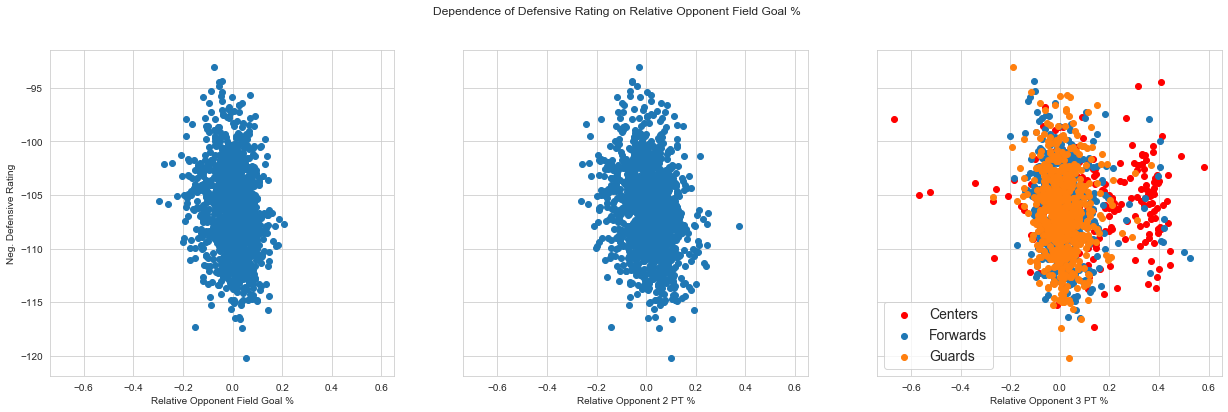

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(21, 6), sharex=True, sharey=True)
plt.suptitle("Dependence of Defensive Rating on Relative Opponent Field Goal %")

plt.axes(ax[0])
plt.scatter(df.DFGP_PG-df['FGP_PH'], -df.DEFRTG)
plt.xlabel('Relative Opponent Field Goal %')
plt.ylabel('Neg. Defensive Rating')

plt.axes(ax[1])
plt.scatter(df.DFGP_2PT_PG-df['2PP_PH'], -df.DEFRTG)
plt.xlabel('Relative Opponent 2 PT %')

plt.axes(ax[2])
plt.scatter(dfc.DFGP_3PT_PG-dfc['3PP_PH'], -dfc.DEFRTG, c='r', label='Centers')
plt.scatter(dff.DFGP_3PT_PG-dff['3PP_PH'], -dff.DEFRTG, label='Forwards')
plt.scatter(dfg.DFGP_3PT_PG-dfg['3PP_PH'], -dfg.DEFRTG, label='Guards')
plt.xlabel('Relative Opponent 3 PT %')
plt.legend(loc='lower left', prop={'size': 14})
#for i, txt in enumerate(df.name):
#    if df.DFGP_3PT_PG.values[i]-df['3PP_PH'].values[i] > 0.3:
#        ax[2].annotate(txt+' '+str(df.year.values[i]), (df.DFGP_3PT_PG.values[i]-df['3PP_PH'].values[i], -df.DEFRTG.values[i]))


# Examining Shot Selection

## 2 PT and 3 PT Usage

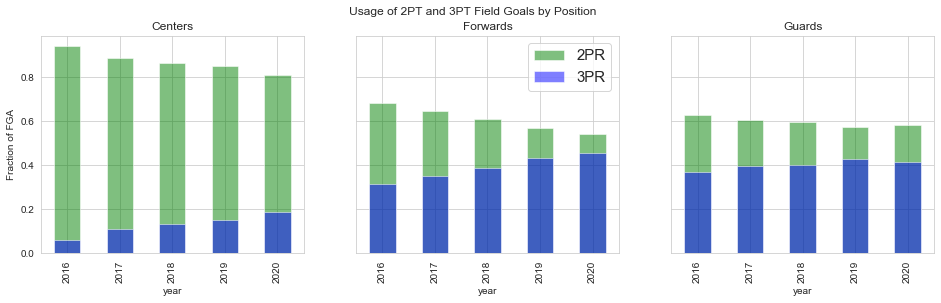

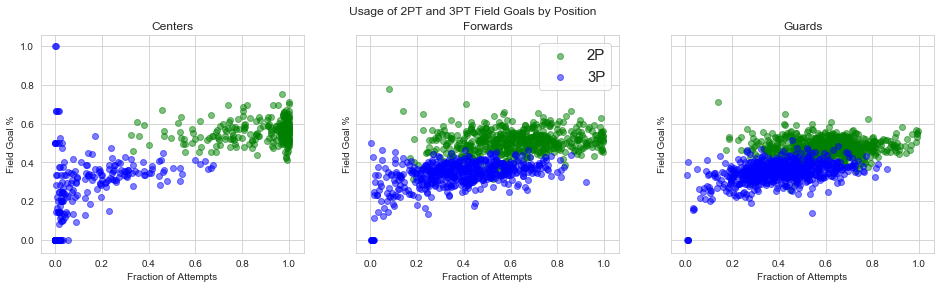

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4), sharex=True, sharey=True)
plt.suptitle("Usage of 2PT and 3PT Field Goals by Position")

plt.axes(ax[0])
plt.title("Centers")
plt.ylabel("Fraction of FGA")
dfc.groupby("year")["2PR"].mean().plot.bar(color='g', alpha=0.5, label="2PA")
dfc.groupby("year")["3PR"].mean().plot.bar(color='b', alpha=0.5, label="3PA")

plt.axes(ax[1])
plt.title("Forwards")
dff.groupby("year")["2PR"].mean().plot.bar(color='g', alpha=0.5)
dff.groupby("year")["3PR"].mean().plot.bar(color='b', alpha=0.5)
plt.legend(loc="upper right", prop={'size': 15})

plt.axes(ax[2])
plt.title("Guards")
dfg.groupby("year")["2PR"].mean().plot.bar(color='g', alpha=0.5)
dfg.groupby("year")["3PR"].mean().plot.bar(color='b', alpha=0.5)
#plt.bar(dfc.groupby("year")["2PR"].mean().reset_index().year.values, dfc.groupby("year")["2PR"].mean().values, color='r')


fig, ax = plt.subplots(1, 3, figsize=(16, 4), sharex=True, sharey=True)
plt.suptitle("Usage of 2PT and 3PT Field Goals by Position")
plt.axes(ax[0])
plt.title("Centers")
plt.xlabel("Fraction of Attempts")
plt.ylabel("Field Goal %")
plt.scatter(dfc["2PR"], dfc["2PP_PH"], color='g', alpha=0.5, label="2P")
plt.scatter(dfc["3PR"], dfc["3PP_PH"], color='b', alpha=0.5, label="3P")

plt.axes(ax[1])
plt.title("Forwards")
plt.xlabel("Fraction of Attempts")
plt.ylabel("Field Goal %")
plt.scatter(dff["2PR"], dff["2PP_PH"], color='g', alpha=0.5, label="2P")
plt.scatter(dff["3PR"], dff["3PP_PH"], color='b', alpha=0.5, label="3P")
plt.legend(loc="upper right", prop={'size': 15})

plt.axes(ax[2])
plt.title("Guards")
plt.xlabel("Fraction of Attempts")
plt.ylabel("Field Goal %")
plt.scatter(dfg["2PR"], dfg["2PP_PH"], color='g', alpha=0.5, label="2P")
plt.scatter(dfg["3PR"], dfg["3PP_PH"], color='b', alpha=0.5, label="3P")


## Shot Selection by Location

In [22]:
# 'FGM_', 'FGA_', 'FGP_'
dist_5ft = ['05FT', '59FT', '1014FT', '1519FT', '2024FT', '2529FT']
dist_5ft_title = ['0-5 FT', '5-9 FT', '10-14 FT', '15-19 FT', '20-24 FT', '25-29 FT']

dist_8ft = ['08FT', '816FT', '1624FT', 'GT24FT', 'BC']

dist_zones = ['RA', 'NONRA', 'MR', 'LC', 'RC', 'AB']
dist_zones_title = ['R.A.', 'Paint', 'Mid.R.', 'L.C.', 'R.C.', 'Top']

<BarContainer object of 6 artists>

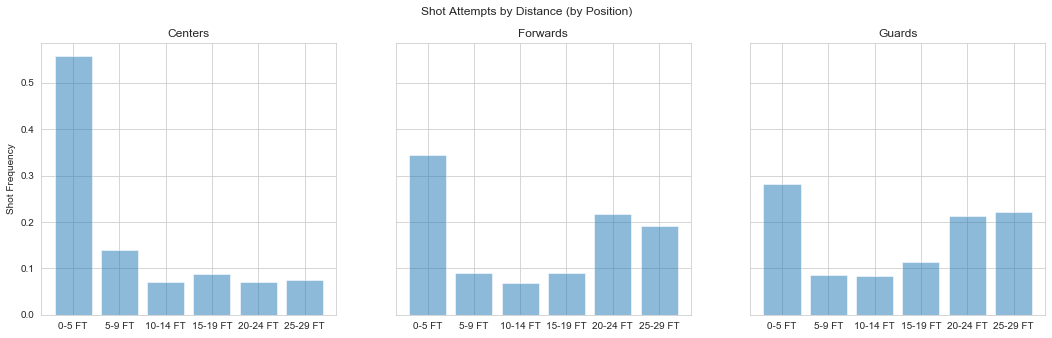

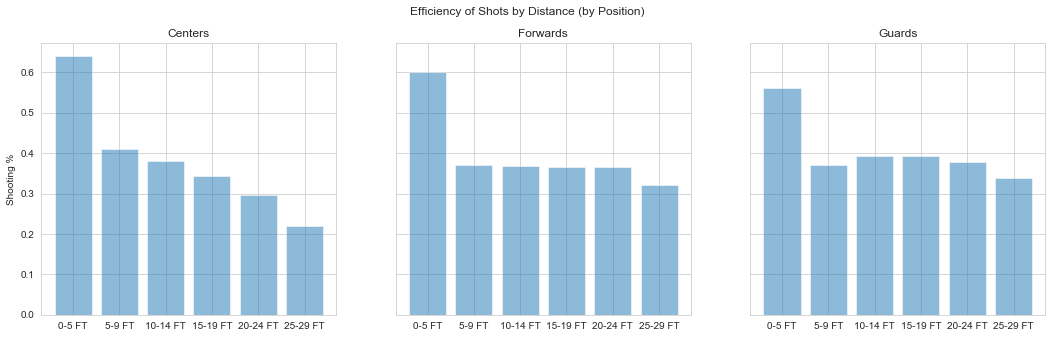

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
plt.suptitle("Shot Attempts by Distance (by Position)")

plt.axes(ax[0])
plt.title('Centers')
plt.ylabel('Shot Frequency')
arr_shots = []
for i,x in enumerate(dist_5ft):
    arr_shots.append((dfc['FGA_'+dist_5ft[i]]*36./(dfc.FGA_PT*dfc.MPG)).mean())
plt.bar(dist_5ft_title, arr_shots, alpha=0.5)

plt.axes(ax[1])
plt.title('Forwards')
arr_shots = []
for i,x in enumerate(dist_5ft):
    arr_shots.append((dff['FGA_'+dist_5ft[i]]*36./(dff.FGA_PT*dff.MPG)).mean())
plt.bar(dist_5ft_title, arr_shots, alpha=0.5)

plt.axes(ax[2])
plt.title('Guards')
arr_shots = []
for i,x in enumerate(dist_5ft):
    arr_shots.append((dfg['FGA_'+dist_5ft[i]]*36./(dfg.FGA_PT*dfg.MPG)).mean())
plt.bar(dist_5ft_title, arr_shots, alpha=0.5)


fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
plt.suptitle("Efficiency of Shots by Distance (by Position)")

plt.axes(ax[0])
plt.title('Centers')
plt.ylabel('Shooting %')
arr_shots = []
for i,x in enumerate(dist_5ft):
    arr_shots.append(dfc['FGP_'+dist_5ft[i]].mean())
plt.bar(dist_5ft_title, arr_shots, alpha=0.5)

plt.axes(ax[1])
plt.title('Forwards')
arr_shots = []
for i,x in enumerate(dist_5ft):
    arr_shots.append(dff['FGP_'+dist_5ft[i]].mean())
plt.bar(dist_5ft_title, arr_shots, alpha=0.5)

plt.axes(ax[2])
plt.title('Guards')
arr_shots = []
for i,x in enumerate(dist_5ft):
    arr_shots.append(dfg['FGP_'+dist_5ft[i]].mean())
plt.bar(dist_5ft_title, arr_shots, alpha=0.5)


<BarContainer object of 6 artists>

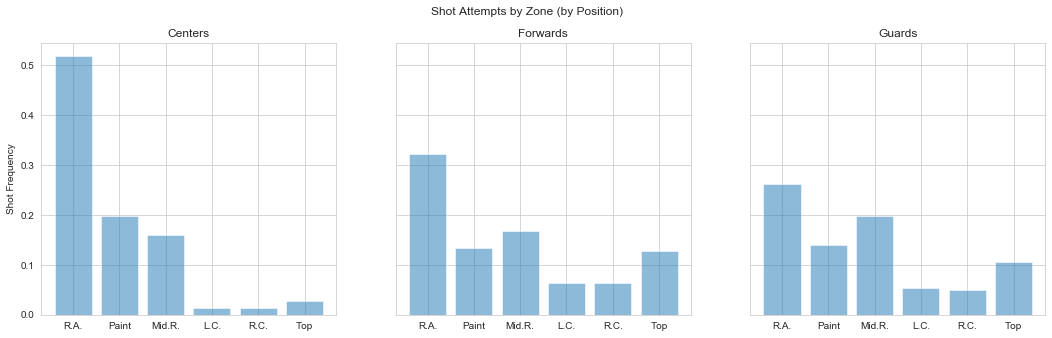

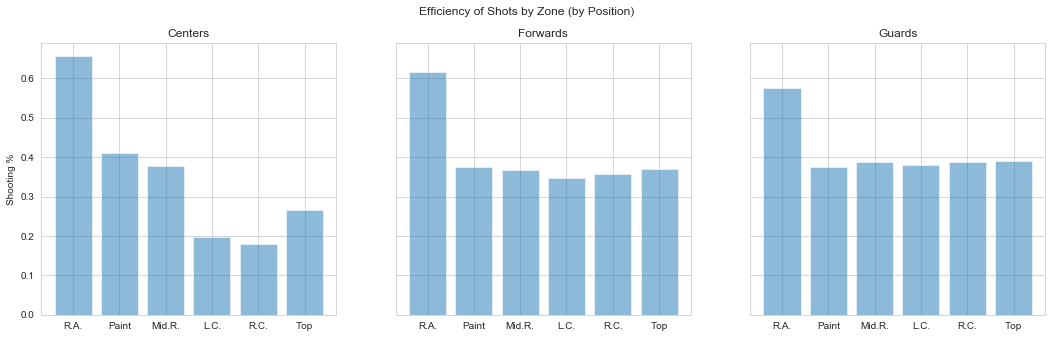

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
plt.suptitle("Shot Attempts by Zone (by Position)")

plt.axes(ax[0])
plt.title('Centers')
plt.ylabel('Shot Frequency')
arr_shots = []
for i,x in enumerate(dist_zones):
    arr_shots.append((dfc['FGA_'+dist_zones[i]]*36./(dfc.FGA_PT*dfc.MPG)).mean())
plt.bar(dist_zones_title, arr_shots, alpha=0.5)

plt.axes(ax[1])
plt.title('Forwards')
arr_shots = []
for i,x in enumerate(dist_zones):
    arr_shots.append((dff['FGA_'+dist_zones[i]]*36./(dff.FGA_PT*dff.MPG)).mean())
plt.bar(dist_zones_title, arr_shots, alpha=0.5)

plt.axes(ax[2])
plt.title('Guards')
arr_shots = []
for i,x in enumerate(dist_zones):
    arr_shots.append((dfg['FGA_'+dist_zones[i]]*36./(dfg.FGA_PT*dfg.MPG)).mean())
plt.bar(dist_zones_title, arr_shots, alpha=0.5)


fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
plt.suptitle("Efficiency of Shots by Zone (by Position)")

plt.axes(ax[0])
plt.title('Centers')
plt.ylabel('Shooting %')
arr_shots = []
for i,x in enumerate(dist_zones):
    arr_shots.append(dfc['FGP_'+dist_zones[i]].mean())
plt.bar(dist_zones_title, arr_shots, alpha=0.5)

plt.axes(ax[1])
plt.title('Forwards')
arr_shots = []
for i,x in enumerate(dist_zones):
    arr_shots.append(dff['FGP_'+dist_zones[i]].mean())
plt.bar(dist_zones_title, arr_shots, alpha=0.5)

plt.axes(ax[2])
plt.title('Guards')
arr_shots = []
for i,x in enumerate(dist_zones):
    arr_shots.append(dfg['FGP_'+dist_zones[i]].mean())
plt.bar(dist_zones_title, arr_shots, alpha=0.5)


## Shot Selection by Number of Dribbles

In [25]:
num_drib = ['0', '1', '2', '36', 'GT7']
drib_title = ['0', '1', '2', '3 - 6', '> 7']

<BarContainer object of 5 artists>

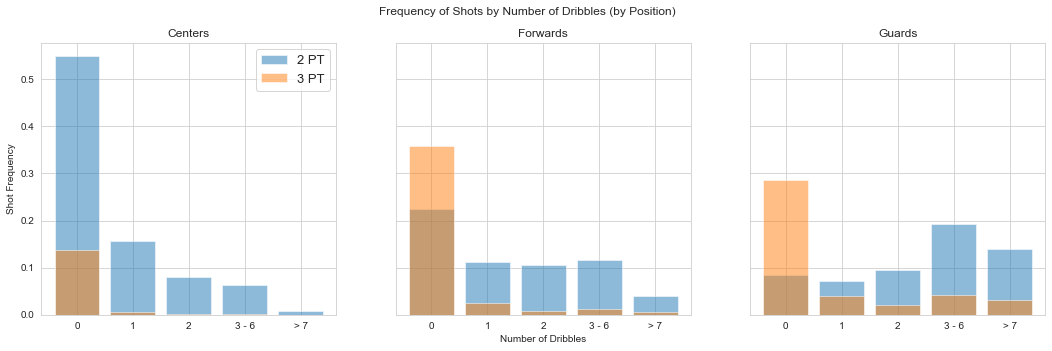

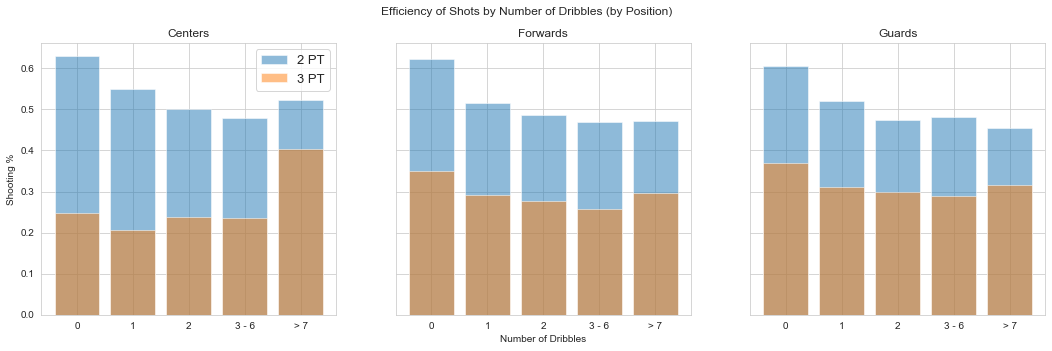

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
plt.suptitle("Frequency of Shots by Number of Dribbles (by Position)")

plt.axes(ax[0])
plt.title('Centers')
plt.ylabel('Shot Frequency')
arr_2PT = []
arr_3PT = []
for i,x in enumerate(num_drib):
    #print(df['2PP_'+num_drib[i]+'DRIB'].mean()/100.)
    arr_2PT.append(dfc['2PT_FREQ_'+num_drib[i]+'DRIB'].mean())
    arr_3PT.append(dfc['3PT_FREQ_'+num_drib[i]+'DRIB'].mean())
plt.bar(drib_title, arr_2PT, alpha=0.5, label='2 PT')
plt.bar(drib_title, arr_3PT, alpha=0.5, label='3 PT')
plt.legend(prop={'size': 13})

plt.axes(ax[1])
plt.title('Forwards')
plt.xlabel('Number of Dribbles')
arr_2PT = []
arr_3PT = []
for i,x in enumerate(num_drib):
    #print(df['2PP_'+num_drib[i]+'DRIB'].mean()/100.)
    arr_2PT.append(dff['2PT_FREQ_'+num_drib[i]+'DRIB'].mean())
    arr_3PT.append(dff['3PT_FREQ_'+num_drib[i]+'DRIB'].mean())
plt.bar(drib_title, arr_2PT, alpha=0.5)
plt.bar(drib_title, arr_3PT, alpha=0.5)

plt.axes(ax[2])
plt.title('Guards')
arr_2PT = []
arr_3PT = []
for i,x in enumerate(num_drib):
    #print(df['2PP_'+num_drib[i]+'DRIB'].mean()/100.)
    arr_2PT.append(dfg['2PT_FREQ_'+num_drib[i]+'DRIB'].mean())
    arr_3PT.append(dfg['3PT_FREQ_'+num_drib[i]+'DRIB'].mean())
plt.bar(drib_title, arr_2PT, alpha=0.5)
plt.bar(drib_title, arr_3PT, alpha=0.5)


fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
plt.suptitle("Efficiency of Shots by Number of Dribbles (by Position)")

plt.axes(ax[0])
plt.title('Centers')
plt.ylabel('Shooting %')
arr_2PT = []
arr_3PT = []
for i,x in enumerate(num_drib):
    #print(df['2PP_'+num_drib[i]+'DRIB'].mean()/100.)
    arr_2PT.append(dfc['2PP_'+num_drib[i]+'DRIB'].mean()/100.)
    arr_3PT.append(dfc['3PP_'+num_drib[i]+'DRIB'].mean())
plt.bar(drib_title, arr_2PT, alpha=0.5, label='2 PT')
plt.bar(drib_title, arr_3PT, alpha=0.5, label='3 PT')
plt.legend(prop={'size': 13})

plt.axes(ax[1])
plt.title('Forwards')
plt.xlabel('Number of Dribbles')
arr_2PT = []
arr_3PT = []
for i,x in enumerate(num_drib):
    #print(df['2PP_'+num_drib[i]+'DRIB'].mean()/100.)
    arr_2PT.append(dff['2PP_'+num_drib[i]+'DRIB'].mean()/100.)
    arr_3PT.append(dff['3PP_'+num_drib[i]+'DRIB'].mean())
plt.bar(drib_title, arr_2PT, alpha=0.5)
plt.bar(drib_title, arr_3PT, alpha=0.5)

plt.axes(ax[2])
plt.title('Guards')
arr_2PT = []
arr_3PT = []
for i,x in enumerate(num_drib):
    #print(df['2PP_'+num_drib[i]+'DRIB'].mean()/100.)
    arr_2PT.append(dfg['2PP_'+num_drib[i]+'DRIB'].mean()/100.)
    arr_3PT.append(dfg['3PP_'+num_drib[i]+'DRIB'].mean())
plt.bar(drib_title, arr_2PT, alpha=0.5)
plt.bar(drib_title, arr_3PT, alpha=0.5)


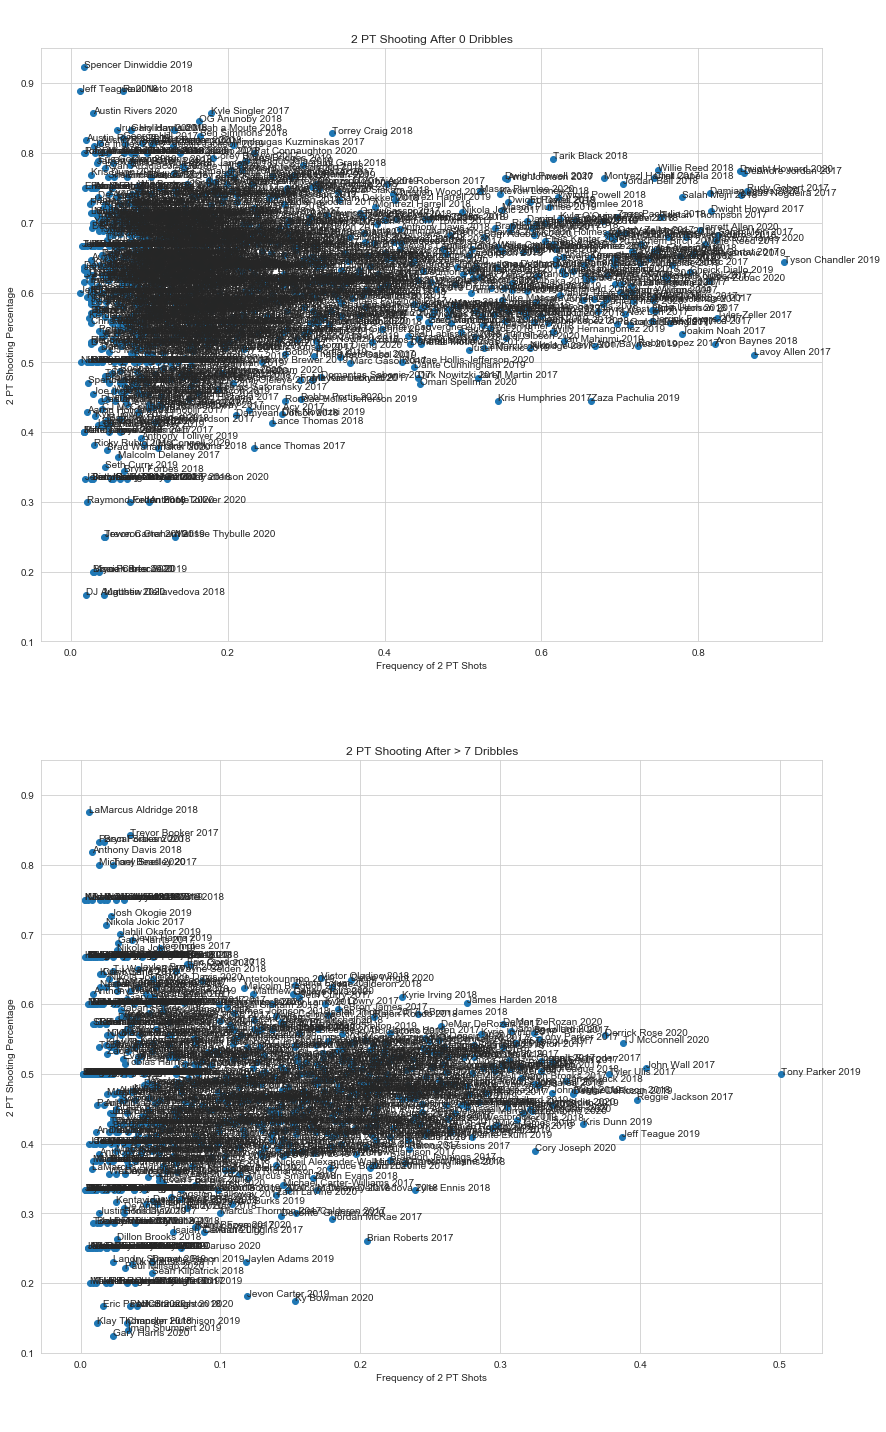

In [27]:
num_drib_new = ['0','GT7']
drib_title_new = ['0', '> 7']

#fig, ax = plt.subplots(len(num_drib), 1, figsize=(14, len(num_drib)*12))
fig, ax = plt.subplots(2, 1, figsize=(14, 24))

for i,x in enumerate(ax):
    if num_drib_new[i] == '0' or num_drib_new[i] == 'GT7':
        plt.axes(x)
        plt.title('2 PT Shooting After '+drib_title_new[i]+' Dribbles')
        plt.xlabel('Frequency of 2 PT Shots')
        plt.ylabel('2 PT Shooting Percentage')
        plt.scatter(df['2PT_FREQ_'+num_drib_new[i]+'DRIB'], df['2PP_'+num_drib_new[i]+'DRIB']/100.)
        plt.ylim(0.1, 0.95)
        for j, txt in enumerate(df.name):
            x.annotate(txt+' '+str(df.year.values[j]), (df['2PT_FREQ_'+num_drib_new[i]+'DRIB'].values[j], df['2PP_'+num_drib_new[i]+'DRIB'].values[j]/100.))     


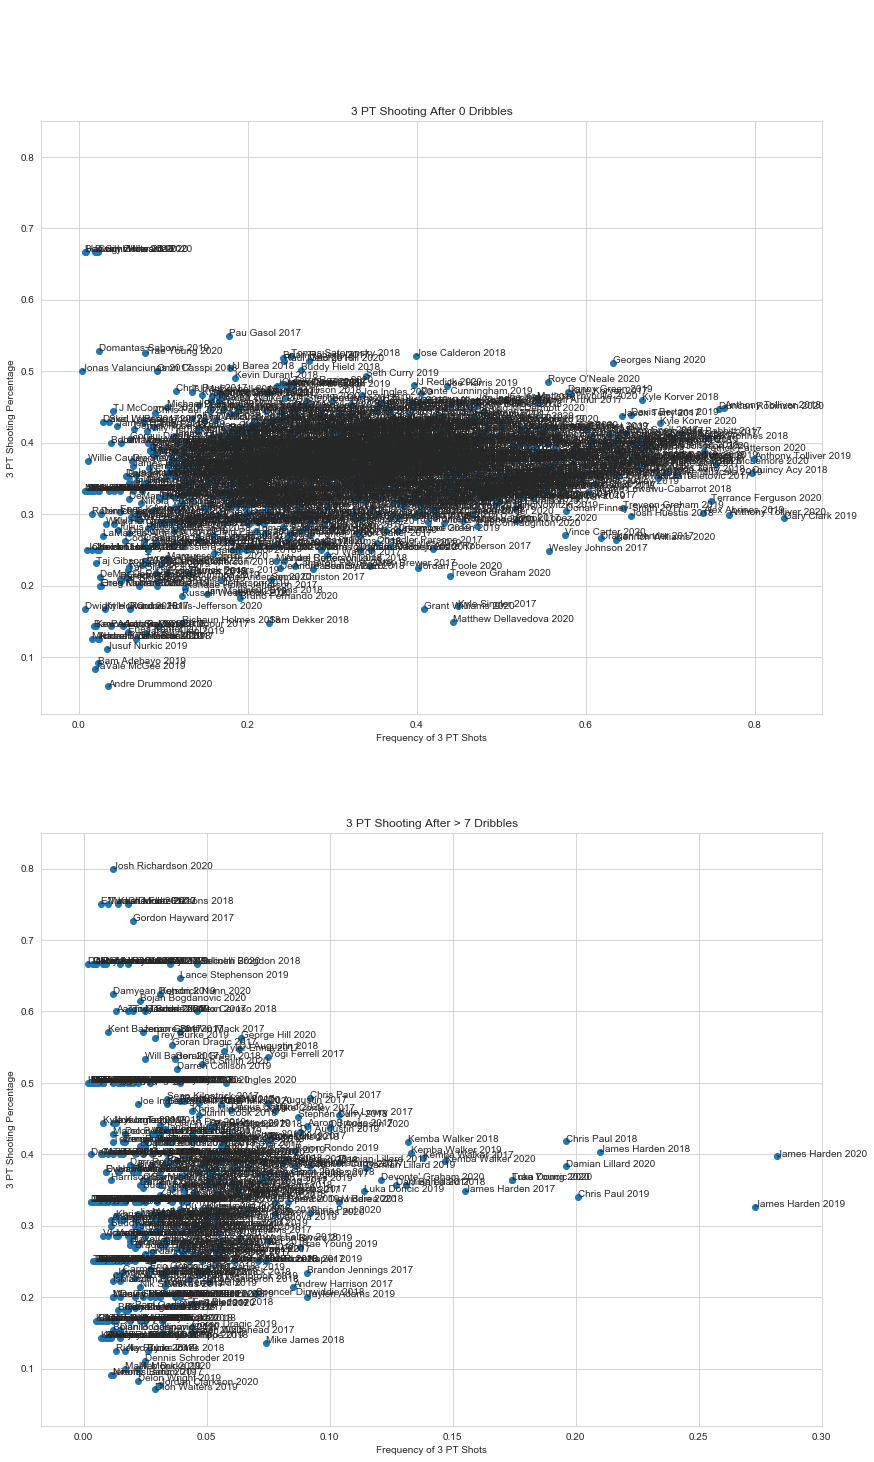

In [28]:
#fig, ax = plt.subplots(len(num_drib), 1, figsize=(14, len(num_drib)*12))
fig, ax = plt.subplots(2, 1, figsize=(14, 24))

for i,x in enumerate(ax):
    plt.axes(x)
    plt.title('3 PT Shooting After '+drib_title_new[i]+' Dribbles')
    plt.xlabel('Frequency of 3 PT Shots')
    plt.ylabel('3 PT Shooting Percentage')
    plt.scatter(df['3PT_FREQ_'+num_drib_new[i]+'DRIB'], df['3PP_'+num_drib_new[i]+'DRIB'])
    plt.ylim(0.02, 0.85)
    for j, txt in enumerate(df.name):
        x.annotate(txt+' '+str(df.year.values[j]), (df['3PT_FREQ_'+num_drib_new[i]+'DRIB'].values[j], df['3PP_'+num_drib_new[i]+'DRIB'].values[j]))
        

## Shot Selection by Defender Separation

In [29]:
num_feet = ['02', '24', '46', 'GT6']
feet_title = ['0 - 2', '2 - 4', '4 - 6', '> 6']

<BarContainer object of 4 artists>

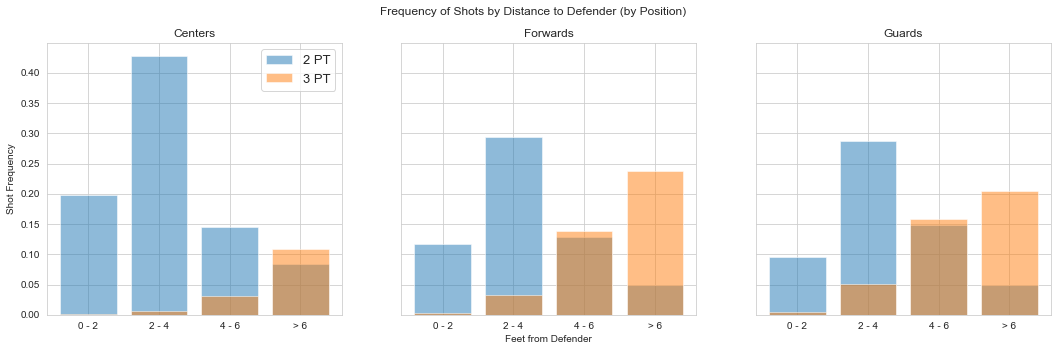

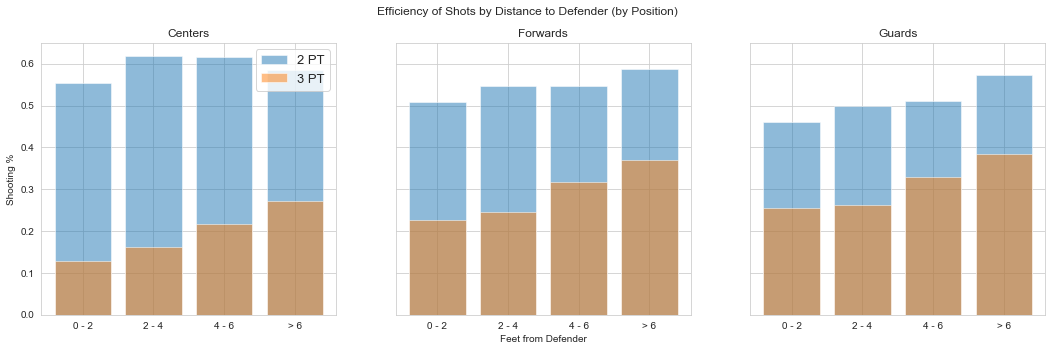

In [30]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
plt.suptitle("Frequency of Shots by Distance to Defender (by Position)")

plt.axes(ax[0])
plt.title('Centers')
plt.ylabel('Shot Frequency')
arr_2PT = []
arr_3PT = []
for i,x in enumerate(num_feet):
    arr_2PT.append(dfc['2PT_FREQ_DEF'+num_feet[i]+'FT'].mean())
    arr_3PT.append(dfc['3PT_FREQ_DEF'+num_feet[i]+'FT'].mean())
plt.bar(feet_title, arr_2PT, alpha=0.5, label='2 PT')
plt.bar(feet_title, arr_3PT, alpha=0.5, label='3 PT')
plt.legend(prop={'size': 13})

plt.axes(ax[1])
plt.title('Forwards')
plt.xlabel('Feet from Defender')
arr_2PT = []
arr_3PT = []
for i,x in enumerate(num_feet):
    arr_2PT.append(dff['2PT_FREQ_DEF'+num_feet[i]+'FT'].mean())
    arr_3PT.append(dff['3PT_FREQ_DEF'+num_feet[i]+'FT'].mean())
plt.bar(feet_title, arr_2PT, alpha=0.5)
plt.bar(feet_title, arr_3PT, alpha=0.5)

plt.axes(ax[2])
plt.title('Guards')
arr_2PT = []
arr_3PT = []
for i,x in enumerate(num_feet):
    arr_2PT.append(dfg['2PT_FREQ_DEF'+num_feet[i]+'FT'].mean())
    arr_3PT.append(dfg['3PT_FREQ_DEF'+num_feet[i]+'FT'].mean())
plt.bar(feet_title, arr_2PT, alpha=0.5)
plt.bar(feet_title, arr_3PT, alpha=0.5)


fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
plt.suptitle("Efficiency of Shots by Distance to Defender (by Position)")

plt.axes(ax[0])
plt.title('Centers')
plt.ylabel('Shooting %')
arr_2PT = []
arr_3PT = []
for i,x in enumerate(num_feet):
    arr_2PT.append(dfc['2PP_DEF'+num_feet[i]+'FT'].mean()/100.)
    arr_3PT.append(dfc['3PP_DEF'+num_feet[i]+'FT'].mean())
plt.bar(feet_title, arr_2PT, alpha=0.5, label='2 PT')
plt.bar(feet_title, arr_3PT, alpha=0.5, label='3 PT')
plt.legend(prop={'size': 13})

plt.axes(ax[1])
plt.title('Forwards')
plt.xlabel('Feet from Defender')
arr_2PT = []
arr_3PT = []
for i,x in enumerate(num_feet):
    arr_2PT.append(dff['2PP_DEF'+num_feet[i]+'FT'].mean()/100.)
    arr_3PT.append(dff['3PP_DEF'+num_feet[i]+'FT'].mean())
plt.bar(feet_title, arr_2PT, alpha=0.5)
plt.bar(feet_title, arr_3PT, alpha=0.5)

plt.axes(ax[2])
plt.title('Guards')
arr_2PT = []
arr_3PT = []
for i,x in enumerate(num_feet):
    arr_2PT.append(dfg['2PP_DEF'+num_feet[i]+'FT'].mean()/100.)
    arr_3PT.append(dfg['3PP_DEF'+num_feet[i]+'FT'].mean())
plt.bar(feet_title, arr_2PT, alpha=0.5)
plt.bar(feet_title, arr_3PT, alpha=0.5)


# Breakdown of Play Types and Styles

In [31]:
# Useful variables for manipulating play-type data
play_types = ['TR', 'ISO', 'PRBH', 'PRRM', 'PU', 'SU', 'HO', 'CUT', 'OS', 'PB', 'MISC']
play_names = ['Transition', 'Isolation', 'PRBH', 'PRRM', 'Post Up', 'Spot Up', 'Hand Off', 'Cut', 'Off Screen', 'Put Back', 'Misc']

def_play_types = ['ISO', 'PRBH', 'PRRM', 'PU', 'SU', 'HO', 'OS']
def_play_names = ['Isolation', 'PRBH', 'PRRM', 'Post Up', 'Spot Up', 'Hand Off', 'Off Screen']

## Usage and Efficiency of Offensive Play Type by Position

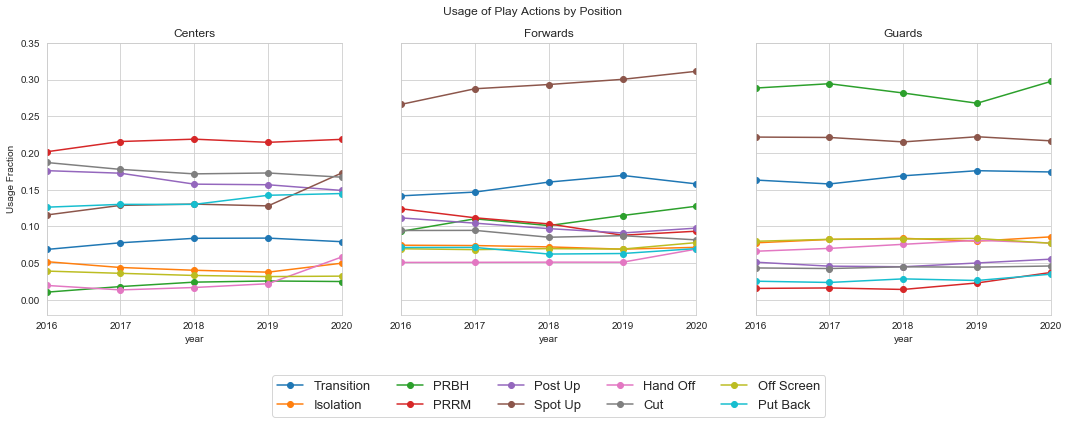

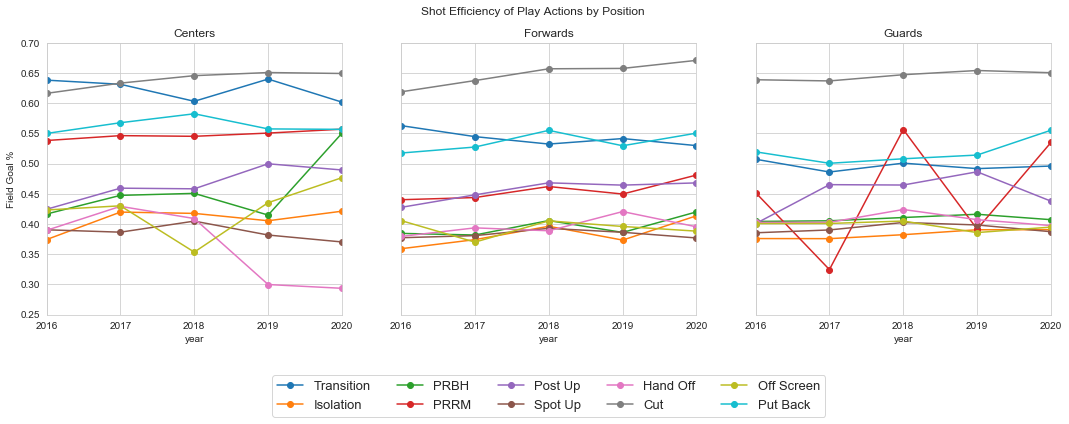

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
plt.suptitle("Usage of Play Actions by Position")

plt.axes(ax[0])
plt.title("Centers")
plt.ylabel("Usage Fraction")
for i,pt in enumerate(play_types):
    if pt != 'MISC':
        dfc[dfc["OFF_FREQ_"+pt]>0].groupby("year")["OFF_FREQ_"+pt].mean().plot(marker="o", label=play_names[i])
plt.ylim(-0.02, 0.35)
ax[0].xaxis.set_major_locator(plt.MultipleLocator(1))

plt.axes(ax[1])
plt.title("Forwards")
for i,pt in enumerate(play_types):
    if pt != 'MISC':
        dff[dff["OFF_FREQ_"+pt]>0].groupby("year")["OFF_FREQ_"+pt].mean().plot(marker="o", label=play_names[i])
ax[1].xaxis.set_major_locator(plt.MultipleLocator(1))
plt.legend(loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.4), prop={'size': 13})
        
plt.axes(ax[2])
plt.title("Guards")
for i,pt in enumerate(play_types):
    if pt != 'MISC':
        dfg[dfg["OFF_FREQ_"+pt]>0].groupby("year")["OFF_FREQ_"+pt].mean().plot(marker="o", label=play_names[i])
ax[2].xaxis.set_major_locator(plt.MultipleLocator(1))


fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
plt.suptitle("Shot Efficiency of Play Actions by Position")

plt.axes(ax[0])
plt.title("Centers")
plt.ylabel("Field Goal %")
for i,pt in enumerate(play_types):
    if pt != 'MISC':
        dfc[dfc["OFF_FREQ_"+pt]>0].groupby("year")["OFF_FGP_"+pt].mean().plot(marker="o", label=play_names[i])
#plt.legend(loc="center left")
plt.ylim(0.25, 0.7)
ax[0].xaxis.set_major_locator(plt.MultipleLocator(1))

plt.axes(ax[1])
plt.title("Forwards")
for i,pt in enumerate(play_types):
    if pt != 'MISC':
        dff[dff["OFF_FREQ_"+pt]>0].groupby("year")["OFF_FGP_"+pt].mean().plot(marker="o", label=play_names[i])
ax[1].xaxis.set_major_locator(plt.MultipleLocator(1))
plt.legend(loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.4), prop={'size': 13})

plt.axes(ax[2])
plt.title("Guards")
for i,pt in enumerate(play_types):
    if pt != 'MISC':
        dfg[dfg["OFF_FREQ_"+pt]>0].groupby("year")["OFF_FGP_"+pt].mean().plot(marker="o", label=play_names[i])
ax[2].xaxis.set_major_locator(plt.MultipleLocator(1))


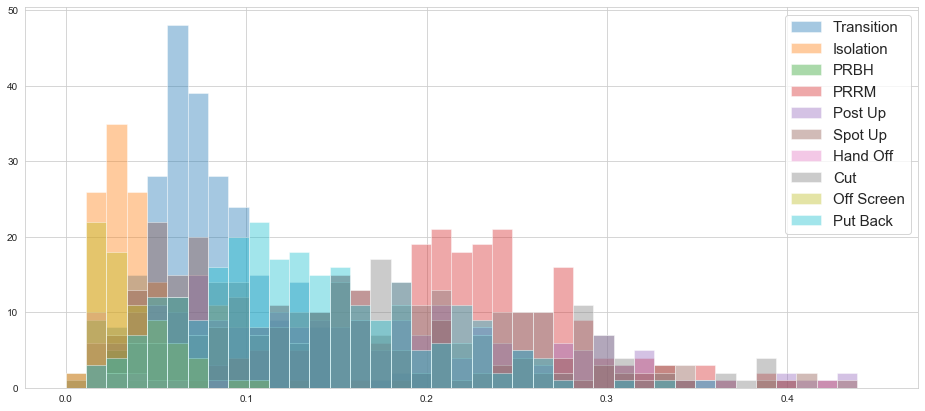

In [33]:
fig, ax = plt.subplots(figsize=(16, 7))
#plt.yscale("log")
for i,pt in enumerate(play_types):
    if pt != 'MISC':
        plt.hist(dfc[dfc['OFF_FREQ_'+pt]>0.01]['OFF_FREQ_'+pt], bins=40, alpha=0.4, label=play_names[i], range=(0,0.45))
plt.legend(prop={'size': 15})


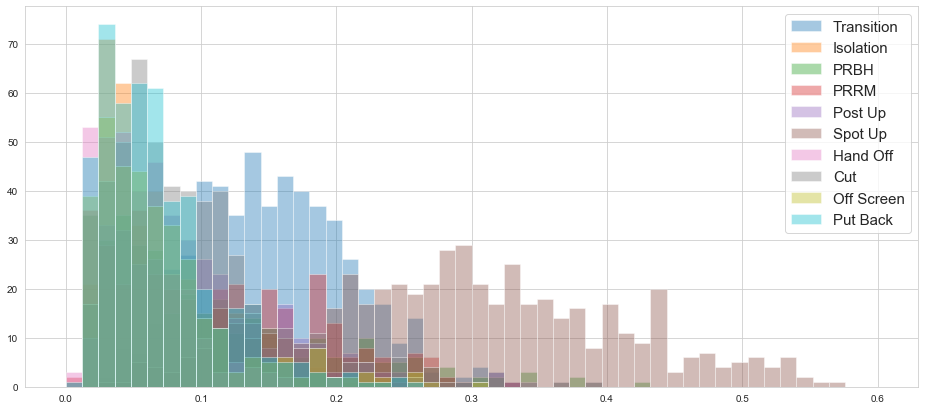

In [34]:
fig, ax = plt.subplots(figsize=(16, 7))
for i,pt in enumerate(play_types):
    if pt != 'MISC':
        plt.hist(dff[dff['OFF_FREQ_'+pt]>0.01]['OFF_FREQ_'+pt], bins=50, alpha=0.4, label=play_names[i], range=(0,0.6))
plt.legend(prop={'size': 15})


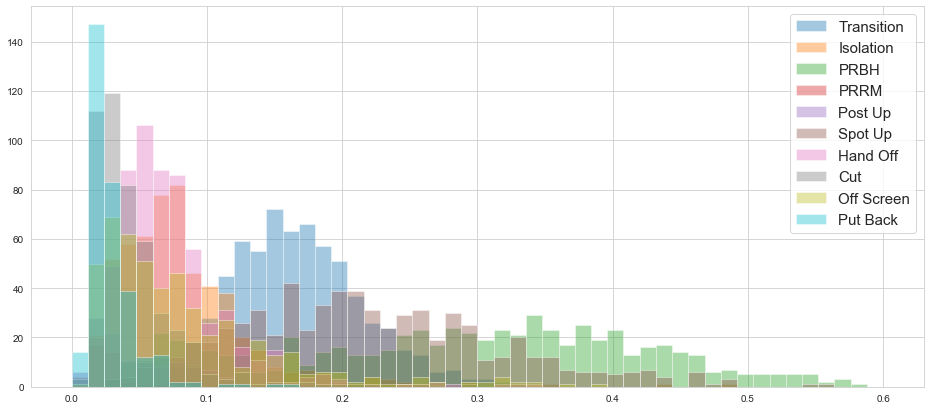

In [35]:
fig, ax = plt.subplots(figsize=(16, 7))
for i,pt in enumerate(play_types):
    if pt != 'MISC':
        plt.hist(dfg[dfg['OFF_FREQ_'+pt]>0.01]['OFF_FREQ_'+pt], bins=50, alpha=0.4, label=play_names[i], range=(0,0.6))
plt.legend(prop={'size': 15})


## Frequency and Efficiency of Defensive Play Type by Position

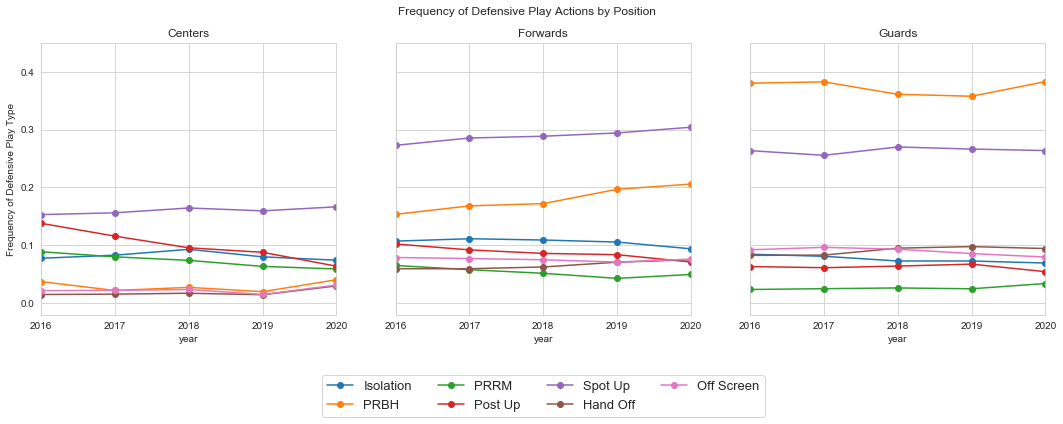

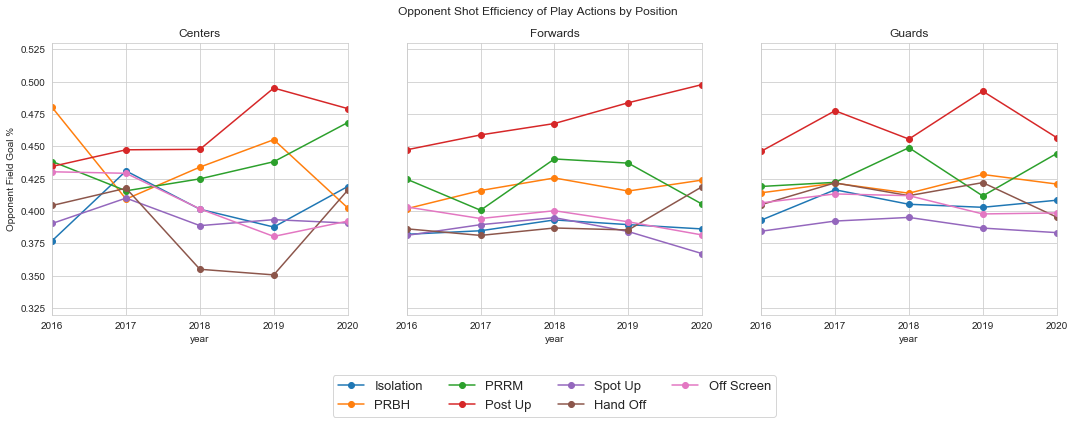

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
plt.suptitle("Frequency of Defensive Play Actions by Position")

plt.axes(ax[0])
plt.title("Centers")
plt.ylabel("Frequency of Defensive Play Type")
for i,pt in enumerate(def_play_types):
    if pt != 'MISC':
        dfc[dfc["DEF_FREQ_"+pt]>0].groupby("year")["DEF_FREQ_"+pt].mean().plot(marker="o", label=def_play_names[i])
plt.ylim(-0.02, 0.45)
ax[0].xaxis.set_major_locator(plt.MultipleLocator(1))

plt.axes(ax[1])
plt.title("Forwards")
for i,pt in enumerate(def_play_types):
    if pt != 'MISC':
        dff[dff["DEF_FREQ_"+pt]>0].groupby("year")["DEF_FREQ_"+pt].mean().plot(marker="o", label=def_play_names[i])
ax[1].xaxis.set_major_locator(plt.MultipleLocator(1))
plt.legend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.4), prop={'size': 13})
        
plt.axes(ax[2])
plt.title("Guards")
for i,pt in enumerate(def_play_types):
    if pt != 'MISC':
        dfg[dfg["DEF_FREQ_"+pt]>0].groupby("year")["DEF_FREQ_"+pt].mean().plot(marker="o", label=def_play_names[i])
ax[2].xaxis.set_major_locator(plt.MultipleLocator(1))


fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)
plt.suptitle("Opponent Shot Efficiency of Play Actions by Position")

plt.axes(ax[0])
plt.title("Centers")
plt.ylabel("Opponent Field Goal %")
for i,pt in enumerate(def_play_types):
    if pt != 'MISC':
        dfc[dfc["DEF_FREQ_"+pt]>0].groupby("year")["DEF_FGP_"+pt].mean().plot(marker="o", label=def_play_names[i])
#plt.legend(loc="center left")
plt.ylim(0.32, 0.53)
ax[0].xaxis.set_major_locator(plt.MultipleLocator(1))

plt.axes(ax[1])
plt.title("Forwards")
for i,pt in enumerate(def_play_types):
    if pt != 'MISC':
        dff[dff["DEF_FREQ_"+pt]>0].groupby("year")["DEF_FGP_"+pt].mean().plot(marker="o", label=def_play_names[i])
ax[1].xaxis.set_major_locator(plt.MultipleLocator(1))
plt.legend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.4), prop={'size': 13})

plt.axes(ax[2])
plt.title("Guards")
for i,pt in enumerate(def_play_types):
    if pt != 'MISC':
        dfg[dfg["DEF_FREQ_"+pt]>0].groupby("year")["DEF_FGP_"+pt].mean().plot(marker="o", label=def_play_names[i])
ax[2].xaxis.set_major_locator(plt.MultipleLocator(1))


## Distribution of Offensive and Defensive Play Type Usage

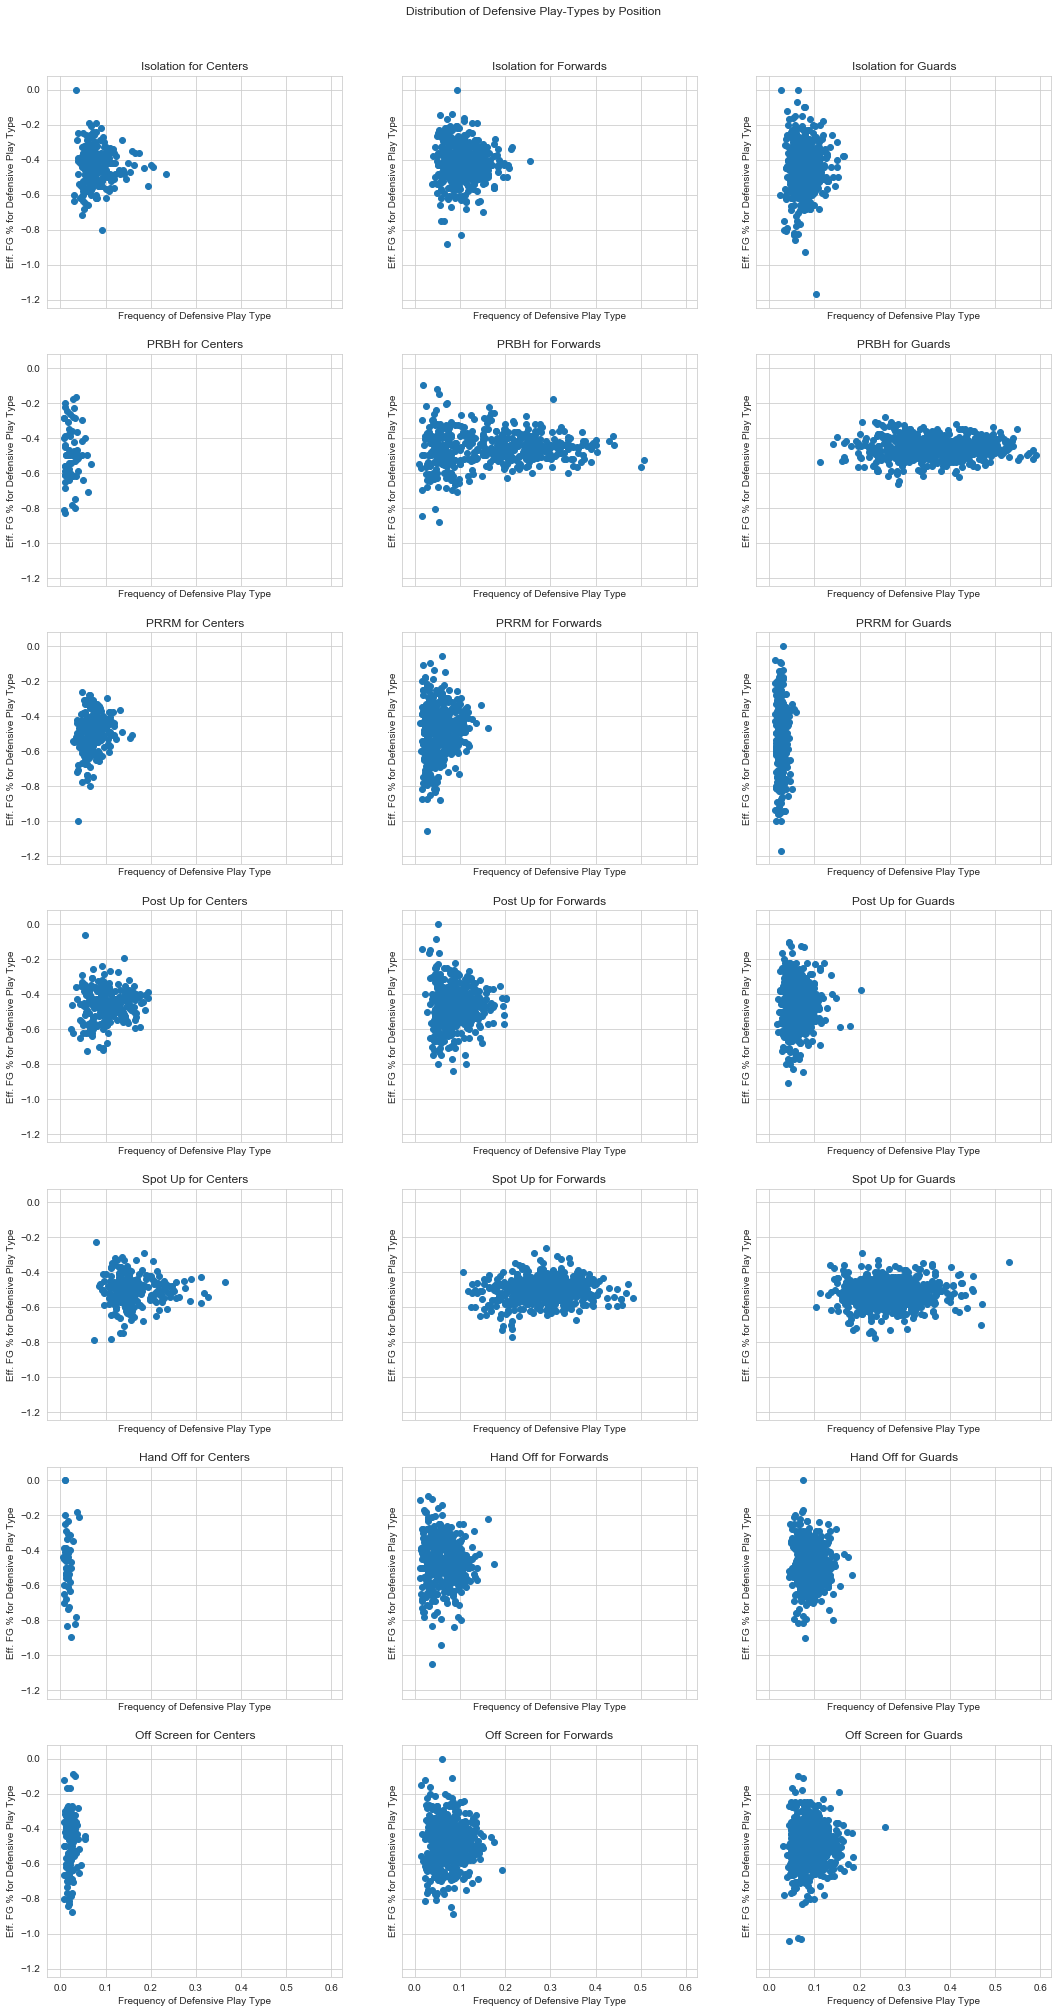

In [37]:
fig, ax = plt.subplots(7, 3, figsize=(18, 32), sharex=True, sharey=True)
#ax = ax.ravel()

plt.suptitle("Distribution of Defensive Play-Types by Position")

fig.subplots_adjust(top=0.95)

for i,pt in enumerate(def_play_types):
    if pt != 'MISC':
        plt.axes(ax[i,0])
        plt.title(def_play_names[i]+' for Centers')
        plt.xlabel("Frequency of Defensive Play Type")
        plt.ylabel("Eff. FG % for Defensive Play Type")
        plt.scatter(dfc[dfc["DEF_FREQ_"+pt]>0]['DEF_FREQ_'+pt], -dfc[dfc["DEF_FREQ_"+pt]>0]['DEF_EFGP_'+pt], marker="o")
        
        plt.axes(ax[i,1])
        plt.title(def_play_names[i]+' for Forwards')
        plt.xlabel("Frequency of Defensive Play Type")
        plt.ylabel("Eff. FG % for Defensive Play Type")
        plt.scatter(dff[dff["DEF_FREQ_"+pt]>0]['DEF_FREQ_'+pt], -dff[dff["DEF_FREQ_"+pt]>0]['DEF_EFGP_'+pt], marker="o")
        
        plt.axes(ax[i,2])
        plt.title(def_play_names[i]+' for Guards')
        plt.xlabel("Frequency of Defensive Play Type")
        plt.ylabel("Eff. FG % for Defensive Play Type")
        plt.scatter(dfg[dfg["DEF_FREQ_"+pt]>0]['DEF_FREQ_'+pt], -dfg[dfg["DEF_FREQ_"+pt]>0]['DEF_EFGP_'+pt], marker="o")

        

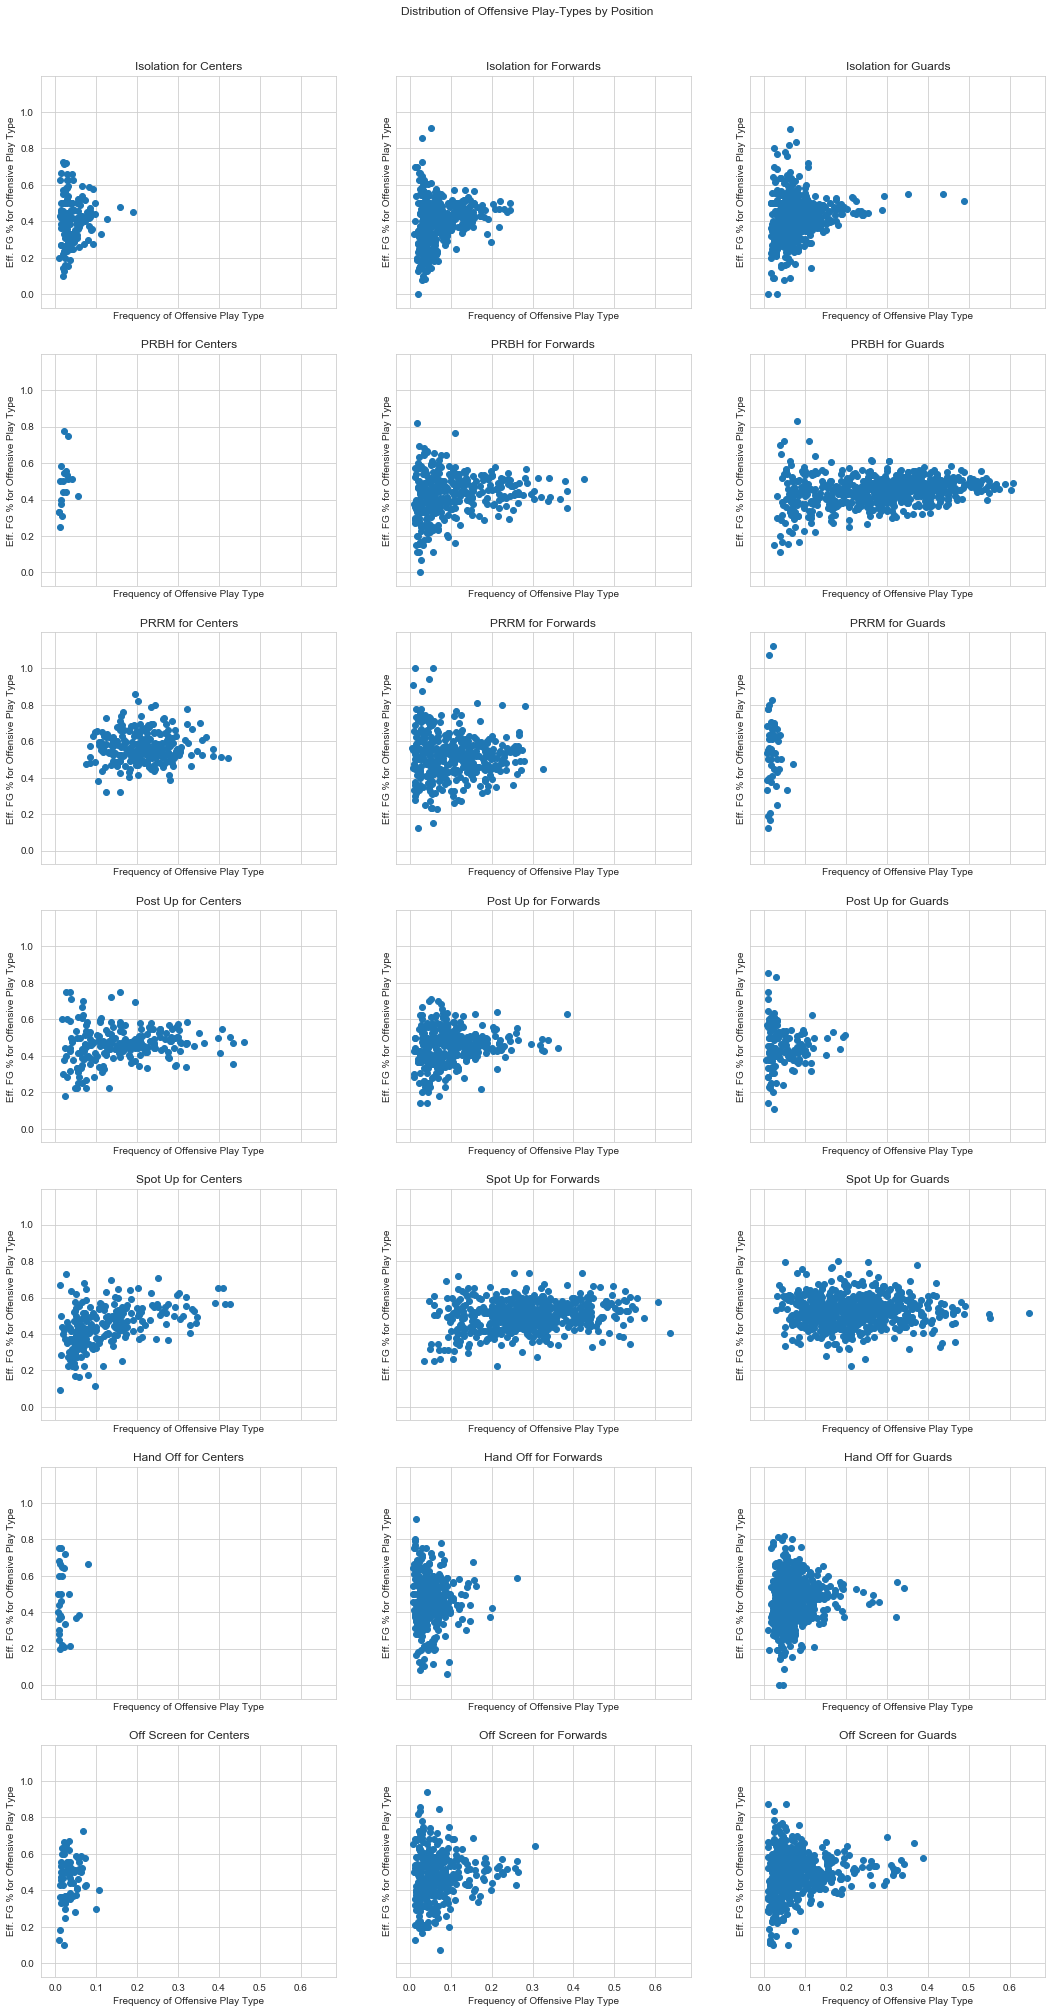

In [38]:
fig, ax = plt.subplots(7, 3, figsize=(18, 32), sharex=True, sharey=True)
#ax = ax.ravel()

plt.suptitle("Distribution of Offensive Play-Types by Position")

fig.subplots_adjust(top=0.95)

for i,pt in enumerate(def_play_types):
    if pt != 'MISC':
        plt.axes(ax[i,0])
        plt.title(def_play_names[i]+' for Centers')
        plt.xlabel("Frequency of Offensive Play Type")
        plt.ylabel("Eff. FG % for Offensive Play Type")
        plt.scatter(dfc[dfc["OFF_FREQ_"+pt]>0]['OFF_FREQ_'+pt], dfc[dfc["OFF_FREQ_"+pt]>0]['OFF_EFGP_'+pt], marker="o")
        
        plt.axes(ax[i,1])
        plt.title(def_play_names[i]+' for Forwards')
        plt.xlabel("Frequency of Offensive Play Type")
        plt.ylabel("Eff. FG % for Offensive Play Type")
        plt.scatter(dff[dff["OFF_FREQ_"+pt]>0]['OFF_FREQ_'+pt], dff[dff["OFF_FREQ_"+pt]>0]['OFF_EFGP_'+pt], marker="o")
        
        plt.axes(ax[i,2])
        plt.title(def_play_names[i]+' for Guards')
        plt.xlabel("Frequency of Offensive Play Type")
        plt.ylabel("Eff. FG % for Offensive Play Type")
        plt.scatter(dfg[dfg["OFF_FREQ_"+pt]>0]['OFF_FREQ_'+pt], dfg[dfg["OFF_FREQ_"+pt]>0]['OFF_EFGP_'+pt], marker="o")        

        

# Player Clustering (by Position)

## Clustering Centers

In [39]:
dfcc = dfc.groupby(['name'], as_index=False).mean()

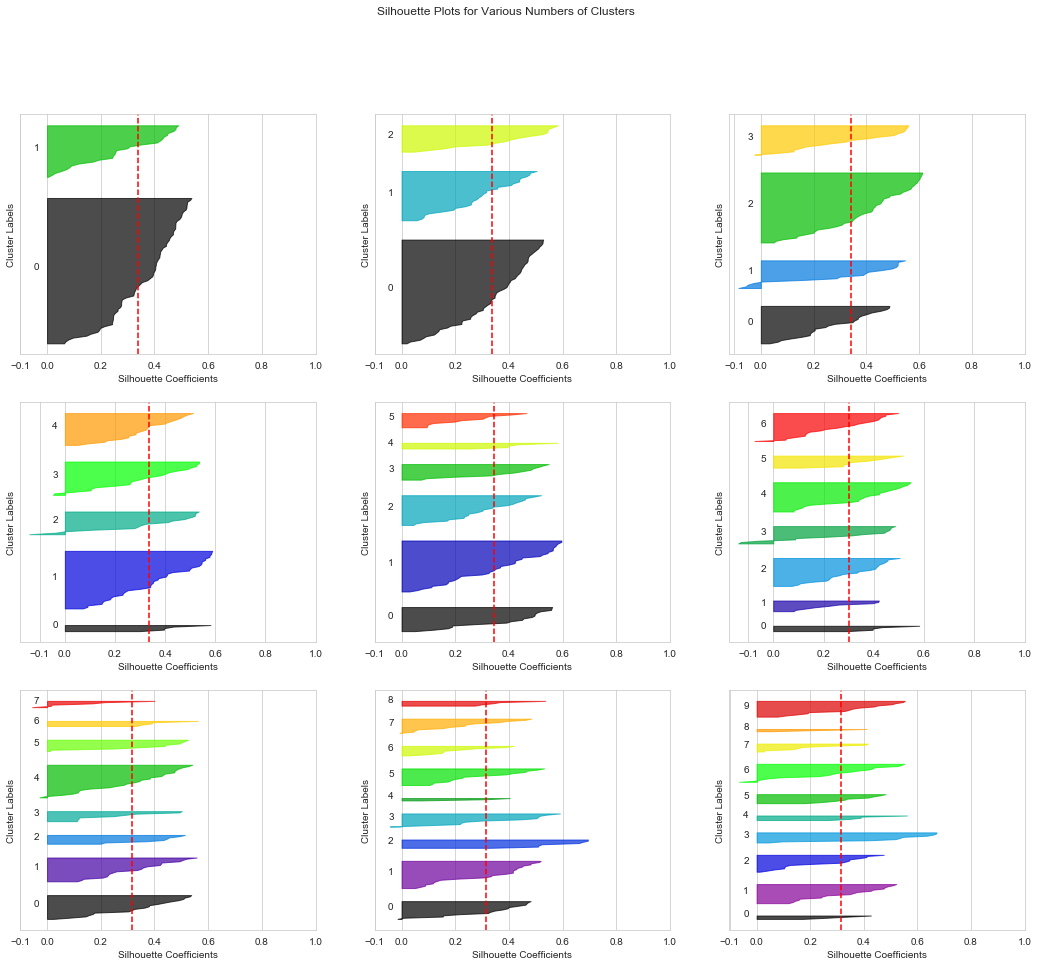

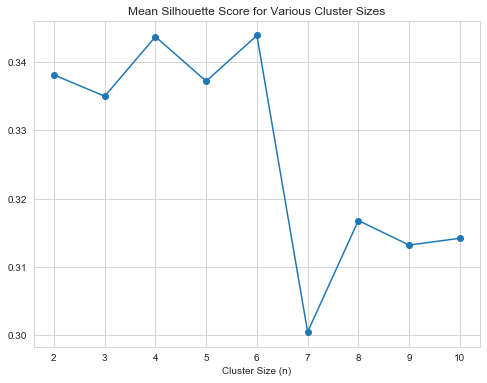

In [40]:
train_cols = ['ATR', '3PR', 'BLK_PH']
x_train = dfcc[train_cols]
xscale = StandardScaler().fit(x_train)
x_train = xscale.transform(x_train)

fig, axs = plt.subplots(3, 3, figsize=(18, 15))
plt.suptitle('Silhouette Plots for Various Numbers of Clusters')

cluster_list = range(2,11)
score = []
for nclust in cluster_list:
    num_clusters = nclust
    kclus = KMeans(n_clusters=num_clusters, random_state=100)
    kmeans = kclus.fit(x_train)
    unscaled = xscale.inverse_transform(kmeans.cluster_centers_)
    
    sil_avg = silhouette_score(x_train, kmeans.labels_)
    score.append(sil_avg)
    sample_silhouette_values = silhouette_samples(x_train, kmeans.labels_)

    y_lower = 10
    ax = axs.flat[nclust-cluster_list[0]]
    for i in range(nclust):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[kmeans.labels_ == i]

        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / nclust)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_xlabel("Silhouette Coefficients")
    ax.set_ylabel("Cluster Labels")

    ax.axvline(x=sil_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
fig, ax = plt.subplots(figsize=(8, 6))
plt.title('Mean Silhouette Score for Various Cluster Sizes')
plt.xlabel('Cluster Size (n)')
plt.plot(cluster_list, score, '-o')


In [41]:
num_clusters = 6
kclus = KMeans(n_clusters=num_clusters, random_state=100)
kmeans = kclus.fit(x_train)
unscaled = xscale.inverse_transform(kmeans.cluster_centers_)

dfcc['center_type'] = kmeans.labels_
if 'center_type' not in train_cols:
    train_cols.append('center_type')


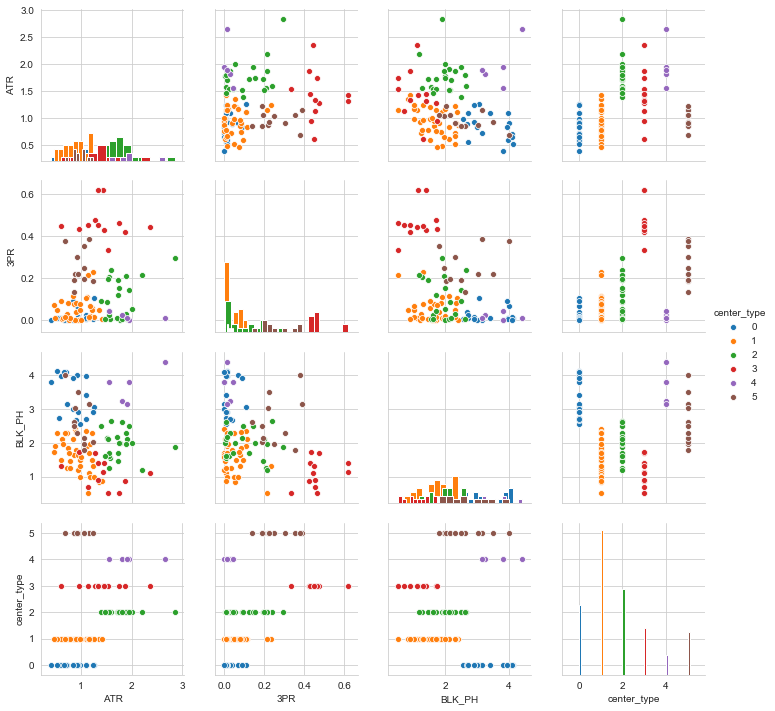

In [42]:
#fig, ax = plt.subplots(figsize=(10, 8))
#plt.title('Centers Clustered by Height and Weight')
#plt.xlabel('Height (inches)')
#plt.ylabel('Weight (lbs)')
#colors = cm.nipy_spectral(kmeans.labels_.astype(float) / num_clusters)
#plt.scatter(dfcc.height, dfcc.weight, c=colors)
#plt.scatter(unscaled[:,0], unscaled[:,1], marker='o', c="white", alpha=1, s=300, edgecolor='k')
#for i, c in enumerate(unscaled):
#    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=75, edgecolor='k')
##for j, txt in enumerate(dfcc.name):
##    ax.annotate(txt, (dfcc.height.values[j], dfcc.weight.values[j]))

sns.pairplot(dfcc[train_cols], hue='center_type', diag_kind='hist')


In [43]:
print('Centers of Type',3,' (Stretch 5s w/ Minimal Shot Blocking):\n', dfcc[dfcc.center_type==3][['name', 'OFFRTG', 'DEFRTG', 'NETRTG']].sort_values(['NETRTG'], ascending=False), '\n')


Centers of Type 3  (Stretch 5s w/ Minimal Shot Blocking):
                  name      OFFRTG      DEFRTG     NETRTG
16      Channing Frye  109.733333  105.000000   4.733333
72        Maxi Kleber  110.000000  106.000000   4.000000
58       Kelly Olynyk  105.066667  102.766667   2.300000
60         Kevin Love  112.700000  111.300000   1.400000
70  Marreese Speights  105.133333  104.600000   0.600000
35     Frank Kaminsky  106.500000  107.000000  -0.475000
28      Dirk Nowitzki  105.500000  107.500000  -2.000000
74       Mike Muscala  103.000000  106.650000  -3.650000
73     Meyers Leonard  108.500000  112.200000  -3.700000
13       Bobby Portis  101.000000  110.500000  -9.500000
77      Moritz Wagner   95.700000  105.500000  -9.800000
55    Justin Hamilton   98.000000  109.800000 -11.700000 



## Clustering Forwards

In [44]:
dfff = dff.groupby(['name'], as_index=False).mean()

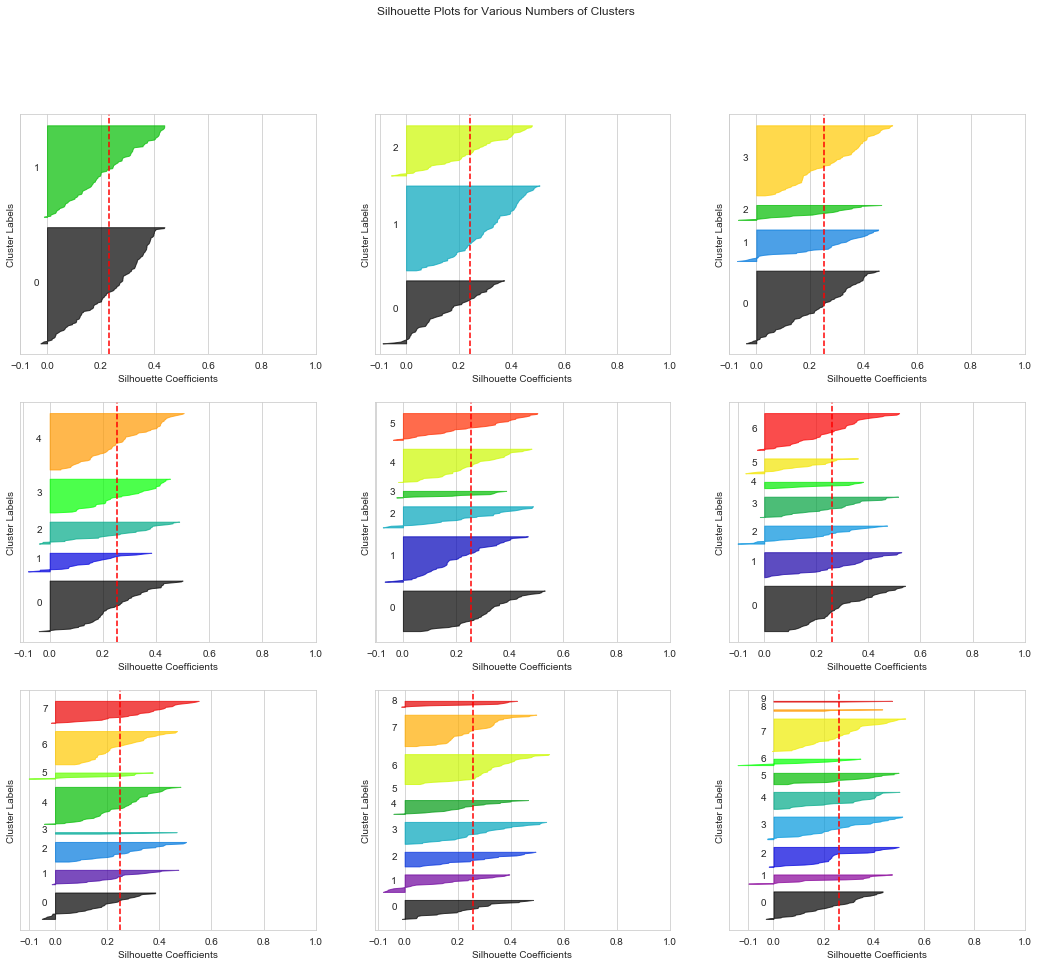

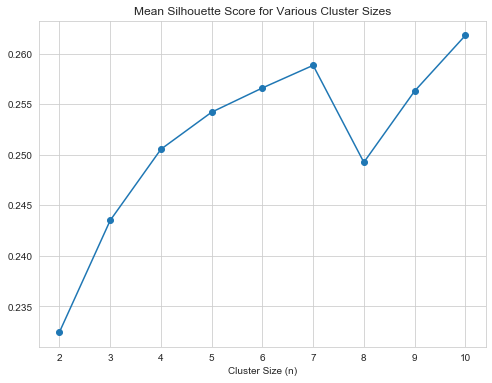

In [45]:
train_cols = ['ATR', '3PR', 'DFGP_3PT_PG']
x_train = dfff[train_cols]
xscale = StandardScaler().fit(x_train)
x_train = xscale.transform(x_train)

fig, axs = plt.subplots(3, 3, figsize=(18, 15))
plt.suptitle('Silhouette Plots for Various Numbers of Clusters')

cluster_list = range(2,11)
score = []
for nclust in cluster_list:
    num_clusters = nclust
    kclus = KMeans(n_clusters=num_clusters, random_state=100)
    kmeans = kclus.fit(x_train)
    unscaled = xscale.inverse_transform(kmeans.cluster_centers_)
    
    sil_avg = silhouette_score(x_train, kmeans.labels_)
    score.append(sil_avg)
    sample_silhouette_values = silhouette_samples(x_train, kmeans.labels_)

    y_lower = 10
    ax = axs.flat[nclust-cluster_list[0]]
    for i in range(nclust):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[kmeans.labels_ == i]

        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / nclust)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_xlabel("Silhouette Coefficients")
    ax.set_ylabel("Cluster Labels")

    ax.axvline(x=sil_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
fig, ax = plt.subplots(figsize=(8, 6))
plt.title('Mean Silhouette Score for Various Cluster Sizes')
plt.xlabel('Cluster Size (n)')
plt.plot(cluster_list, score, '-o')


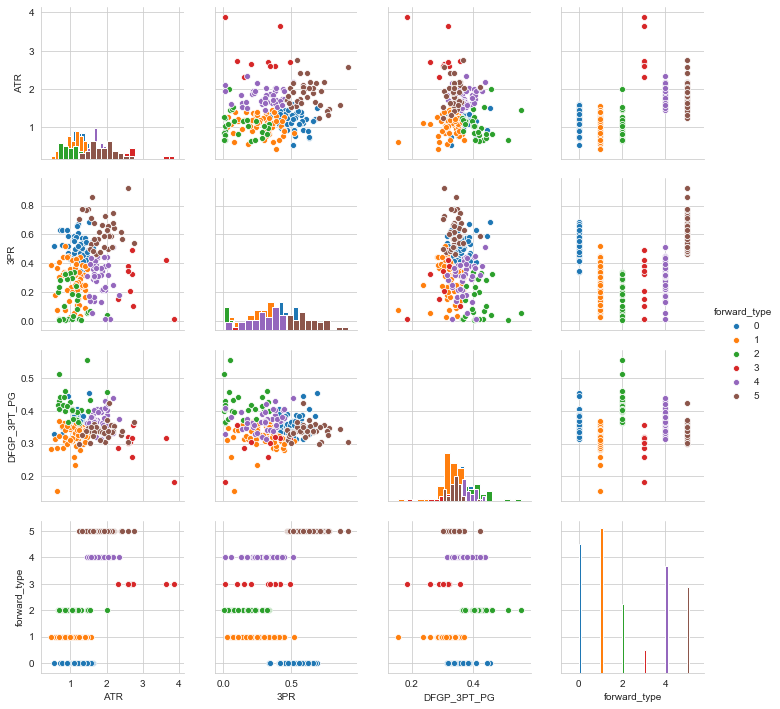

In [46]:
num_clusters = 6
kclus = KMeans(n_clusters=num_clusters, random_state=100)
kmeans = kclus.fit(x_train)
unscaled = xscale.inverse_transform(kmeans.cluster_centers_)

dfff['forward_type'] = kmeans.labels_
if 'forward_type' not in train_cols:
    train_cols.append('forward_type')
    
sns.pairplot(dfff[train_cols], hue='forward_type', diag_kind='hist')

In [47]:
print('Forwards of Type',3,' (Playmaking, Defensive Forwards):\n', dfff[dfff.forward_type==3][['name', 'OFFRTG', 'DEFRTG', 'NETRTG']].sort_values(['NETRTG'], ascending=False), '\n')


Forwards of Type 3  (Playmaking, Defensive Forwards):
                 name      OFFRTG      DEFRTG     NETRTG
58    Draymond Green  115.225000  102.550000  12.675000
6     Andre Iguodala  112.325000  101.750000  10.625000
217      Will Barton  112.300000  104.500000   7.800000
90      Jimmy Butler  110.866667  105.566667   5.333333
116    Kevin Garnett  102.000000   97.400000   4.600000
123    Kyle Anderson  104.680000  101.760000   2.920000
102   Josh McRoberts  102.600000  102.000000   0.600000
107   Justin Jackson  107.433333  108.666667  -1.200000
198  Tayshaun Prince  101.000000  105.000000  -4.000000 



## Clustering Guards

In [48]:
dfgg = dfg.groupby(['name'], as_index=False).mean()

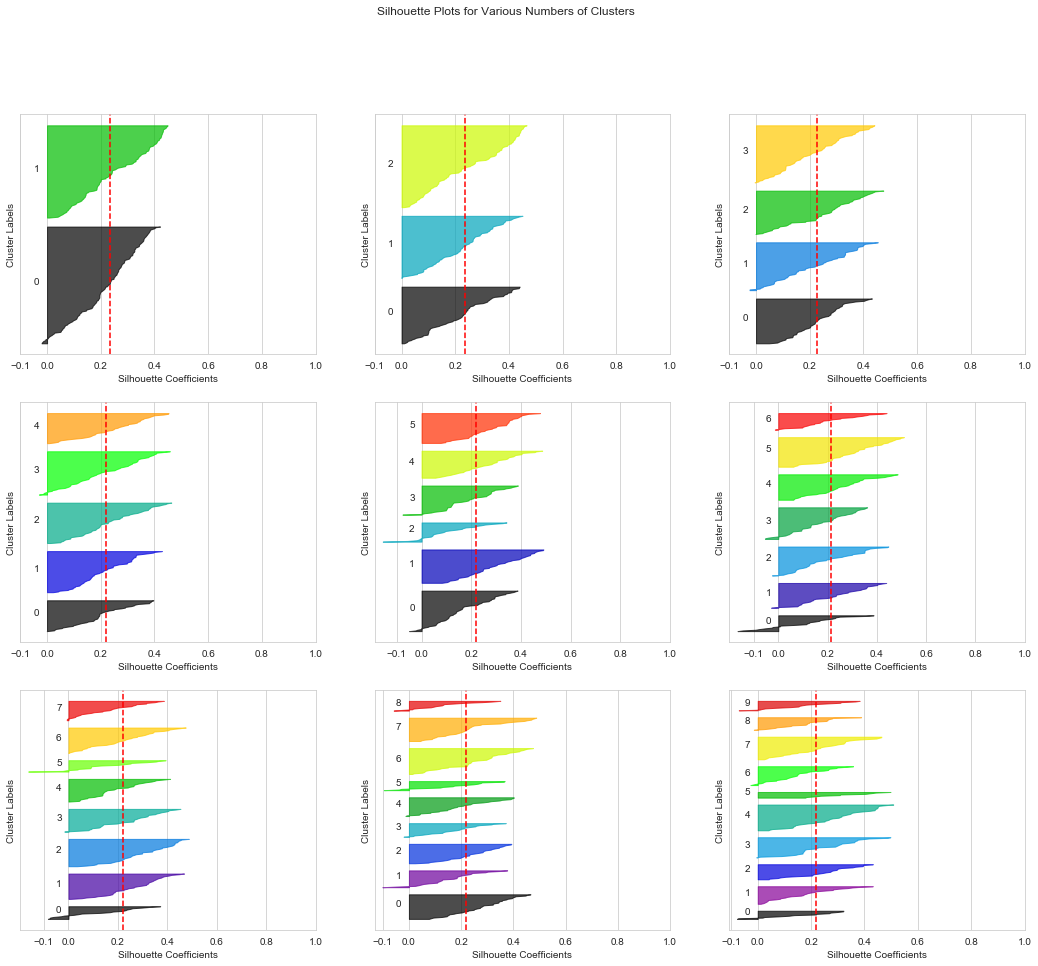

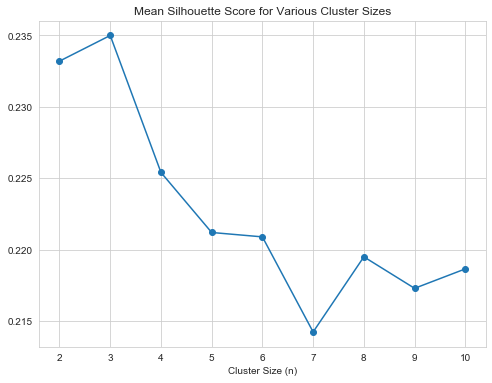

In [49]:
#train_cols = ['ATR', '3PR', 'FG_FREQ_CANDS']
#train_cols = ['ATR', '3PR', 'USG', 'FG_FREQ_MR_AND_PT', 'FG_FREQ_GT1DRIB']
train_cols = ['ASTR', '3PR', 'USG', 'DFGP_PG']
x_train = dfgg[train_cols]
xscale = StandardScaler().fit(x_train)
x_train = xscale.transform(x_train)

fig, axs = plt.subplots(3, 3, figsize=(18, 15))
plt.suptitle('Silhouette Plots for Various Numbers of Clusters')

cluster_list = range(2,11)
score = []
for nclust in cluster_list:
    num_clusters = nclust
    kclus = KMeans(n_clusters=num_clusters, random_state=100)
    kmeans = kclus.fit(x_train)
    unscaled = xscale.inverse_transform(kmeans.cluster_centers_)
    
    sil_avg = silhouette_score(x_train, kmeans.labels_)
    score.append(sil_avg)
    sample_silhouette_values = silhouette_samples(x_train, kmeans.labels_)

    y_lower = 10
    ax = axs.flat[nclust-cluster_list[0]]
    for i in range(nclust):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[kmeans.labels_ == i]

        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / nclust)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_xlabel("Silhouette Coefficients")
    ax.set_ylabel("Cluster Labels")

    ax.axvline(x=sil_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
fig, ax = plt.subplots(figsize=(8, 6))
plt.title('Mean Silhouette Score for Various Cluster Sizes')
plt.xlabel('Cluster Size (n)')
plt.plot(cluster_list, score, '-o')


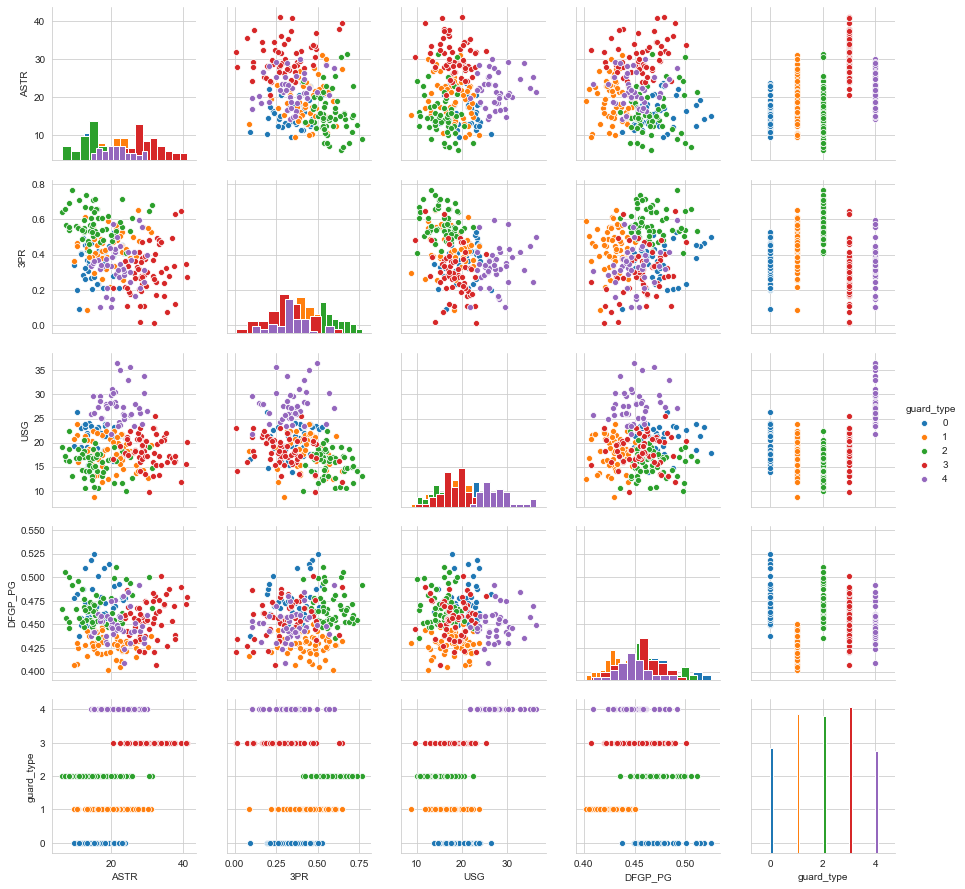

In [50]:
num_clusters = 5
kclus = KMeans(n_clusters=num_clusters, random_state=100)
kmeans = kclus.fit(x_train)
unscaled = xscale.inverse_transform(kmeans.cluster_centers_)

dfgg['guard_type'] = kmeans.labels_
if 'guard_type' not in train_cols:
    train_cols.append('guard_type')
    
sns.pairplot(dfgg[train_cols], hue='guard_type', diag_kind='hist')

In [51]:
print('Guards of Type',2,' (Low-Usage 3 PT Specialists):\n', dfgg[dfgg.guard_type==2][['name', 'OFFRTG', 'DEFRTG', 'NETRTG']].sort_values(['NETRTG'], ascending=False), '\n')


Guards of Type 2  (Low-Usage 3 PT Specialists):
                          name      OFFRTG      DEFRTG        NETRTG
69           Donte DiVincenzo  113.600000   96.600000  1.700000e+01
44                Danny Green  110.840000  101.580000  9.280000e+00
210            Ryan Broekhoff  111.200000  102.800000  8.300000e+00
191               Patty Mills  110.560000  103.420000  7.160000e+00
100                 JJ Redick  111.720000  105.260000  6.460000e+00
82             Furkan Korkmaz  109.200000  104.900000  4.300000e+00
150           Lamar Patterson  106.300000  102.100000  4.200000e+00
229         Terrance Ferguson  111.000000  107.100000  3.900000e+00
162             Malik Beasley  111.200000  107.300000  3.900000e+00
86               Gerald Green  108.333333  104.966667  3.366667e+00
147               Kyle Korver  107.625000  104.375000  3.225000e+00
10             Anthony Morrow  108.250000  105.350000  2.850000e+00
92              Iman Shumpert  109.333333  106.633333  2.700000e+00